<div class="alert alert-block alert-info"> <br>

#  <center> <b> Data Mining Project- ABCDEats Inc. </center> <br>
## <center> Clustering Models </center> <br>
### <center> Group 38 <center>

  <div>

### Group Members
| Name              | Email                        | Student ID |
|-------------------|------------------------------|------------|
| Inês Araújo       | 20240532@novaims.unl.pt      | 20240532   |
| Leonor Mira       | 20240658@novaims.unl.pt      | 20240658   |
| Rafael Silva      | 20240511@novaims.unl.pt      | 20240511   |
| Rita Serra        | 20240515@novaims.unl.pt      | 20240515   |

---

### **2. Clustering Techniques Notebook**
**Description:**
In this notebook, we will experiment with and evaluate various clustering techniques to uncover patterns and groupings within the data. The focus will be on the following methods:

- **Hierarchical Clustering:** Organizes the data into a hierarchy of clusters, providing insights into relationships at multiple levels of granularity.
- **K-Means Clustering:** Partitions the data into a predefined number of clusters (`k`), optimizing similarity within each group.
- **Self-Organizing Maps (SOMs):** Uses neural network-based methods to project high-dimensional data into a lower-dimensional map, revealing complex clustering patterns.

Key steps include:
- Loading the **dataset** for clustering analysis.
- Applying **preprocessing and normalization** to prepare the data for clustering.
- **Implementing clustering algorithms**: Experimenting with the three techniques mentioned above.
- **Visualization and evaluation:** Visualizing cluster formations and analyzing their quality using metrics such as Silhouette Score.
- **Comparison:** Comparing the strengths and limitations of each method.

This notebook serves as a foundational exploration of clustering methods, providing insights into how different techniques handle the same dataset.

---

## **Table of Contents** <br>

---

<div class="alert alert-block alert-success">
<a class="anchor" id="importlibraries">

# 1. Import Libraries
    
</a>
<div>

In [1]:
import pandas as pd  # Imports the pandas library, used for handling and analyzing structured data in tables (DataFrames).
import numpy as np  # Imports numpy, which is helpful for working with numerical data, especially for mathematical functions and arrays.
import matplotlib.pyplot as plt  # Imports matplotlib's pyplot module to create plots and charts for visualizing data.
import seaborn as sns  # Imports seaborn, a library built on matplotlib, for creating more advanced and visually appealing statistical graphics.
from math import ceil  # Imports the ceil function from the math library, which rounds numbers up to the nearest whole number.
from scipy.stats import f_oneway # Import the f_oneway function from SciPy for performing a one-way ANOVA test
import matplotlib.cm as cm
import matplotlib.colors as mpl_colors
from matplotlib.patches import RegularPolygon
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colorbar


# --
from os.path import join
from scipy.cluster.hierarchy import dendrogram
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import  AgglomerativeClustering, DBSCAN, KMeans, MeanShift, estimate_bandwidth
from minisom import MiniSom 
from sklearn.metrics import silhouette_score, silhouette_samples


sns.set()

<div class="alert alert-block alert-success">
<a class="anchor" id="importdataset">
    
# 2. Import dataset
    
</a>
<div>

In [2]:
df = pd.read_csv('Preprocessed_Data.csv', index_col='customer_id')

In [3]:
df.columns

Index(['customer_age', 'vendor_count', 'product_count', 'first_order',
       'last_order', 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
       'CUI_Chicken Dishes',
       ...
       'is_chain_6', 'is_chain_7', 'is_chain_8', 'is_chain_9',
       'is_chain_Other Chains', 'last_promo_DISCOUNT', 'last_promo_FREEBIE',
       'last_promo_NOPROMO', 'payment_method_CASH', 'payment_method_DIGI'],
      dtype='object', length=109)

In [4]:
df_clusters = df.copy()

In [5]:
cuisine_cols= df_clusters.columns[df_clusters.columns.str.contains('CUI_')].tolist()
# Create a list with variables referring to the hours of the day
hr_cols = df_clusters.columns[df_clusters.columns.str.contains('HR')].tolist()
# Create a list with variables referring to the days of the week
dow_cols = df_clusters.columns[df_clusters.columns.str.contains('DOW')].tolist()

In [6]:
df_clusters.drop(columns = hr_cols, inplace = True)
df_clusters.drop(columns = cuisine_cols, inplace = True)
df_clusters.drop(columns = dow_cols, inplace = True)

In [7]:
df_clusters.columns

Index(['customer_age', 'vendor_count', 'product_count', 'first_order',
       'last_order', 'dif_order', 'tot_CUI', 'tot_work_days',
       'tot_leisure_days', 'total_products_by_week', 'total_products_by_day',
       'tot_early_morning', 'tot_breakfast', 'tot_lunch', 'tot_afternoon',
       'tot_dinner', 'tot_late_night', 'tot_western_cuisines',
       'tot_oriental_cuisines', 'tot_other_cuisines', 'purchased_cuisines',
       'customer_region_2440', 'customer_region_2490', 'customer_region_4140',
       'customer_region_4660', 'customer_region_8370', 'customer_region_8550',
       'customer_region_8670', 'is_chain_1', 'is_chain_10', 'is_chain_11',
       'is_chain_12', 'is_chain_13', 'is_chain_14', 'is_chain_15',
       'is_chain_16', 'is_chain_17', 'is_chain_18', 'is_chain_19',
       'is_chain_2', 'is_chain_20', 'is_chain_21', 'is_chain_22',
       'is_chain_23', 'is_chain_24', 'is_chain_25', 'is_chain_26',
       'is_chain_27', 'is_chain_28', 'is_chain_29', 'is_chain_3', 'is_chain

Before beginning the clustering process, we can reduce the dimensionality of the features by categorizing them into four main groups, each representing different aspects of customer information and behavior:

1. **Customer Profile (`Customer_perfil`)**  
   Describes the basic details and temporal purchase activity of the customer:  
   - `customer_age`: The age of the customer.  
   - `first_order`: The date of the customer's first order.  
   - `last_order`: The date of the customer's most recent order.  
   - `dif_order`: The time difference between the first and last order, indicating customer activity over time.

2. **Purchasing Patterns (`Purchasing_patterns`)**  
   Highlights the customer's ordering behavior on specific days:  
   - `tot_work_days`: Total number of orders placed on working days.  
   - `tot_leisure_days`: Total number of orders placed on leisure or non-working days.

3. **Customer Behavior (`Customer_behavior`)**  
   Analyzes the customer's activity based on time-of-day preferences:  
   - `tot_early_morning`: Orders placed in the early morning.  
   - `tot_breakfast`: Orders placed during breakfast hours.  
   - `tot_lunch`: Orders placed during lunch hours.  
   - `tot_afternoon`: Orders placed in the afternoon.  
   - `tot_dinner`: Orders placed during dinner hours.  
   - `tot_late_night`: Orders placed late at night.

4. **Culinary Preferences (`Culinary_preferences`)**  
   Focuses on the customer's choice of cuisines and overall culinary habits:  
   - `tot_western_cuisines`: Total orders of Western-style cuisines.  
   - `tot_oriental_cuisines`: Total orders of Oriental-style cuisines.  
   - `tot_other_cuisines`: Total orders of other styles of cuisines.  
   - `purchased_cuisines`: The specific cuisines purchased by the customer.  
   - `tot_CUI`: Total number of unique cuisines ordered by the customer.  


In [8]:
Customer_perfil = ['customer_age', 'first_order', 'last_order', 'dif_order']
Purchasing_patterns = ['tot_work_days', 'tot_leisure_days']
Customer_behavior = ['tot_early_morning', 'tot_breakfast','tot_lunch', 'tot_afternoon', 'tot_dinner', 'tot_late_night']
Culinary_preferences = ['tot_western_cuisines', 'tot_oriental_cuisines', 'tot_other_cuisines', 'purchased_cuisines', 'tot_CUI']

In [9]:
# Criar subsets para cada categoria
df_selected_1 = df[Customer_perfil]
df_selected_2 = df[Purchasing_patterns]
df_selected_3 = df[Customer_behavior]
df_selected_4 = df[Culinary_preferences]

In [10]:
# Dictionary of categories and your respective features

categories = {
    'Customer_perfil': ['customer_age', 'first_order', 'last_order', 'dif_order'],
    'Purchasing_patterns': ['tot_work_days', 'tot_leisure_days'],
    'Customer_behavior': ['tot_early_morning', 'tot_breakfast', 'tot_lunch', 'tot_afternoon', 'tot_dinner', 'tot_late_night'],
    'Culinary_preferences': ['tot_western_cuisines', 'tot_oriental_cuisines', 'tot_other_cuisines', 'purchased_cuisines', 'tot_CUI']
}

<div class="alert alert-block alert-success">
<a class="anchor" id="section_3">
    
# 3. Hierarchical Clustering
    
</a>
<div>

To address the computational complexity associated with large datasets, we will implement a hybrid approach that combines K-Means and Hierarchical Clustering (HC). This strategy leverages the efficiency of K-Means and the precision of HC, resulting in a more effective and scalable analysis.

### $SS_{t},  SS_{w}, SS_{b}$

In [52]:
def get_sst(df_clusters, feats):
    """
    Calculate the sum of squares (SST) for the given DataFrame.

    The sum of squares is computed as the sum of the variances of each column
    multiplied by the number of non-NA/null observations minus one.

    Parameters:
    df_clusters (pandas.DataFrame): The input DataFrame for which the sum of squares is to be calculated.
    feats (list of str): A list of feature column names to be used in the calculation.

    Returns:
    float: The sum of squares of the DataFrame.
    """
    df_clusters_ = df_clusters[feats]
    sst = np.sum(df_clusters_.var() * (df_clusters_.count() - 1))
    
    return sst 




def get_ssb(df_clusters, feats, label_col):
    """
    Calculate the between-group sum of squares (SSB) for the given DataFrame.
    The between-group sum of squares is computed as the sum of the squared differences
    between the mean of each group and the overall mean, weighted by the number of observations
    in each group.

    Parameters:
    df_clusters (pandas.DataFrame): The input DataFrame containing the data.
    feats (list of str): A list of feature column names to be used in the calculation.
    label_col (str): The name of the column in the DataFrame that contains the group labels.
    
    Returns
    float: The between-group sum of squares of the DataFrame.
    """
    
    ssb_i = 0
    for i in np.unique(df_clusters[label_col]):
        df_clusters_ = df_clusters.loc[:, feats]
        X_ = df_clusters_.values
        X_k = df_clusters_.loc[df_clusters[label_col] == i].values
        
        ssb_i += (X_k.shape[0] * (np.square(X_k.mean(axis=0) - X_.mean(axis=0))) )

    ssb = np.sum(ssb_i)
    

    return ssb


def get_ssw(df_clusters, feats, label_col):
    """
    Calculate the sum of squared within-cluster distances (SSW) for a given DataFrame.

    Parameters:
    df_clusters (pandas.DataFrame): The input DataFrame containing the data.
    feats (list of str): A list of feature column names to be used in the calculation.
    label_col (str): The name of the column containing cluster labels.

    Returns:
    float: The sum of squared within-cluster distances (SSW).
    """
    feats_label = feats+[label_col]

    df_clusters_k = df_clusters[feats_label].groupby(by=label_col).apply(lambda col: get_sst(col, feats), 
                                                       include_groups=False)

    return df_clusters_k.sum()

In [53]:
# df_clusters_sst_ = get_sst(df_clusters_concat, metric_features)
# df_clusters_ssb_ = get_ssb(df_clusters_concat, metric_features, 'labels')
# df_clusters_ssw_ = get_ssw(df_clusters_concat, metric_features, 'labels')

# print("SSb:  ", df_clusters_ssb_)
# print("SSw:  ", df_clusters_ssw_)
# print("SSt:  ", df_clusters_sst_)
# print("SSt == SSb+SSw ? ", (df_clusters_sst_ == df_clusters_ssb_ + df_clusters_ssw_))


### $R^2$

In [54]:

def get_rsq(df_clusters, feats, label_col):
    """
    Calculate the R-squared value for a given DataFrame and features.

    Parameters:
    df_clusters (pd.DataFrame): The input DataFrame containing the data.
    feats (list): A list of feature column names to be used in the calculation.
    label_col (str): The name of the column containing the labels or cluster assignments.

    Returns:
    float: The R-squared value, representing the proportion of variance explained by the clustering.
    """

    df_clusters_sst_ = get_sst(df_clusters, feats)                 # get total sum of squares
    df_clusters_ssw_ = get_ssw(df_clusters, feats, label_col)     # get ss within
    df_clusters_ssb_ = df_clusters_sst_ - df_clusters_ssw_                 # get ss between

    # r2 = ssb/sst 
    return (df_clusters_ssb_/df_clusters_sst_)

In [55]:
def get_r2_hc(df_clusters, link_method, max_nclus, min_nclus=1, dist="euclidean"):
    """This function computes the R2 for a set of cluster solutions given by the application of a hierarchical method.
    The R2 is a measure of the homogenity of a cluster solution. It is based on SSt = SSw + SSb and R2 = SSb/SSt. 
    
    Parameters:
    df_clusters (DataFrame): Dataset to apply clustering
    link_method (str): either "ward", "complete", "average", "single"
    max_nclus (int): maximum number of clusters to compare the methods
    min_nclus (int): minimum number of clusters to compare the methods. Defaults to 1.
    dist (str): distance to use to compute the clustering solution. Must be a valid distance. Defaults to "euclidean".
    
    Returns:
    ndarray: R2 values for the range of cluster solutions
    """
    
    r2 = []  # where we will store the R2 metrics for each cluster solution
    feats = df_clusters.columns.tolist()
    
    for i in range(min_nclus, max_nclus+1):  # iterate over desired ncluster range
        cluster = AgglomerativeClustering(n_clusters=i, metric=dist, linkage=link_method)
        
        #get cluster labels
        hclabels = cluster.fit_predict(df_clusters) 
        
        # concat df_clusters with labels
        df_clusters_concat = pd.concat([df_clusters, pd.Series(hclabels, name='labels', index=df_clusters.index)], axis=1)  
        
        
        # append the R2 of the given cluster solution
        r2.append(get_rsq(df_clusters_concat, feats, 'labels'))
        
    return np.array(r2)

<a class="anchor" id="section_3_1">
    
## 3.1  Customer Perfil Perspective
    
</a>

In [56]:
def inertia(df, start, end, step):
    k_values = range(start, end, step)
    inertias = []
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(df)  
        inertias.append(kmeans.inertia_)
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, inertias, marker='o', linestyle='-', color='b')
    plt.title('K-Means Inertia for Different Values of k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

In [57]:
unique_points = pd.DataFrame(df_selected_1).drop_duplicates().shape[0]
print(f"Maximum number of possible clusters: {unique_points}")


Maximum number of possible clusters: 21116


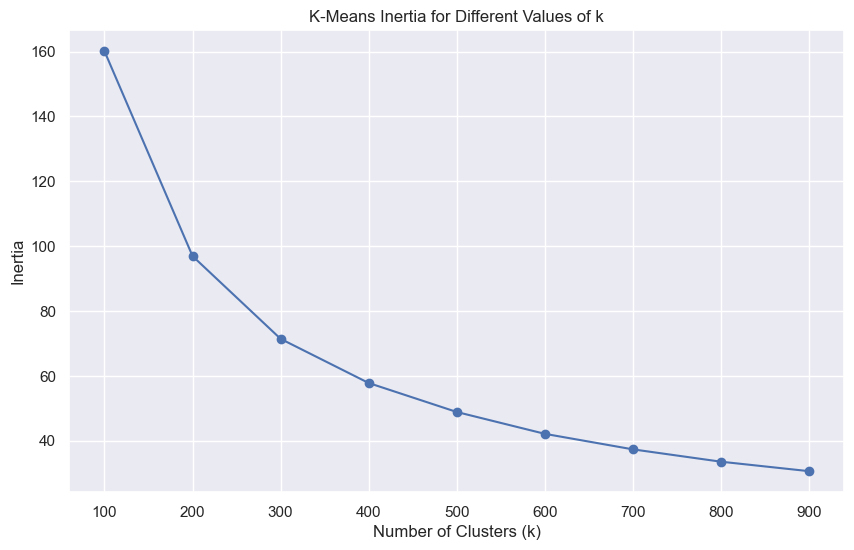

In [58]:
inertia(df_selected_1, 100, end=1000, step=100)

In [59]:
'''
Initialize the KMeans algorithm with the specified parameters
- n_clusters: The number of clusters to form 
- init: 'k-means++' to optimize initial cluster center selection and improve convergence
- n_init: The number of times the algorithm will run with different centroid seeds
- random_state: Ensures reproducibility of the clustering results
'''
kmeans = KMeans(n_clusters=400, init='k-means++',n_init=15,random_state=42)

# Fit the KMeans algorithm to the data (df_selected_1), predict cluster labels and extract the cluster centers 
km_labels = kmeans.fit_predict(df_selected_1)  
clust_centers = kmeans.cluster_centers_

km_prefil=df_selected_1.copy()
# Add a new column to the copied DataFrame containing the cluster labels (0- 199)
km_prefil['kmeans_labels']= km_labels
# Group by the 'kmeans_labels' column and calculate the mean for each cluster
km_prefil = km_prefil.groupby("kmeans_labels").mean()

In [60]:
hc_methods = ["ward", "complete", "average", "single"]
max_nclus = 10

r2_hc = np.vstack([ get_r2_hc(km_prefil, 
                              link, 
                              max_nclus=max_nclus, 
                              min_nclus=1, 
                              dist="euclidean") 
                              for link in hc_methods])
r2_hc_methods = pd.DataFrame(r2_hc.T, index=range(1, max_nclus + 1), columns=hc_methods)


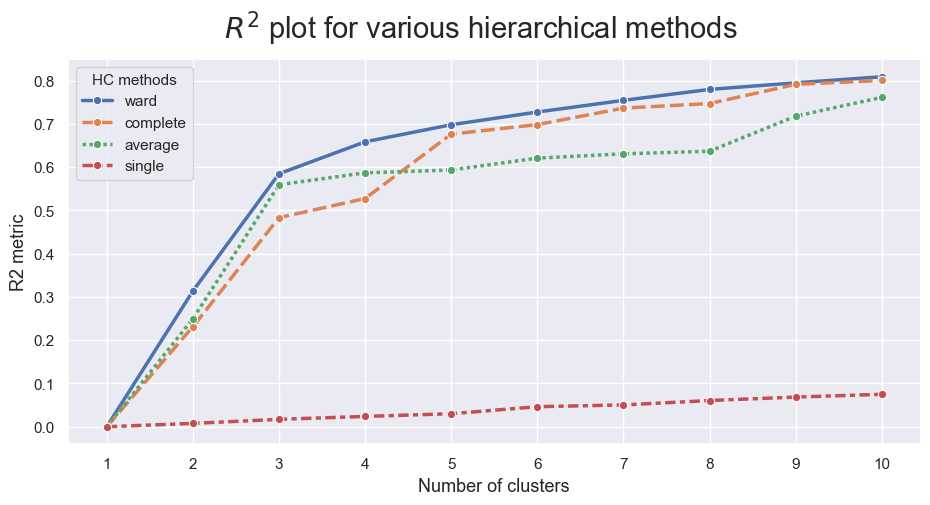

In [61]:
# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

fig.suptitle("$R^2$ plot for various hierarchical methods", fontsize=21)

plt.show()

- Ward presents the highest R2 for any number of clusters, indicating that it best explains the variation in the data. It is ideal for forming compact, well-separated clusters.
- When looking at the graphs, the "elbow" of the curve occurs in 3 clusters, regardless of the method used.

### Defining the number of clusters:

In [62]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'ward'
distance = 'euclidean'


hclust = AgglomerativeClustering(linkage=linkage, metric=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(km_prefil)

array([244, 389, 352, 388, 277, 297, 264, 222, 283, 387, 337, 391, 374,
       272, 210, 215, 340, 298, 295, 228, 399, 347, 286, 205, 315, 212,
       293, 339, 335, 361, 396, 380, 291, 268, 224, 300, 241, 306, 240,
       398, 209, 249, 304, 324, 261, 341, 169, 193, 356, 348, 346, 238,
       307, 328, 289, 296, 376, 330, 290, 390, 357, 292, 288, 355, 373,
       386, 383, 325, 310, 144, 384, 358, 207, 305, 239, 250, 368, 360,
       329, 274, 370, 260, 393, 281, 308, 262, 237, 319, 338, 365, 234,
       242, 168, 318, 323, 246, 204, 229, 372, 236, 247, 385, 254, 369,
       334, 354, 255, 284, 164, 256, 333, 311, 353, 270, 199, 351, 377,
       217, 366, 276, 216, 287, 394, 203, 279, 336, 124, 359, 202, 345,
       285, 206, 107, 265, 362, 392, 271, 191, 220, 395, 248, 176, 280,
       312, 226, 225, 309, 313, 381, 266, 263, 123, 321, 303, 294, 235,
       317, 231, 275, 299, 252, 223, 154, 232, 214, 145, 152, 201, 382,
       314, 178, 194, 153, 245, 156, 342, 278, 175, 138, 151, 24

In [63]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

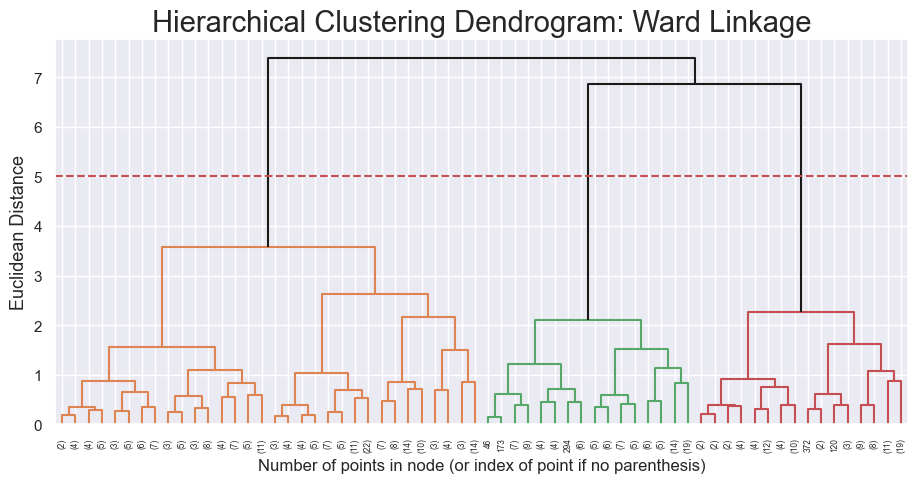

In [64]:
# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 5
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering Dendrogram: {linkage.title()} Linkage', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

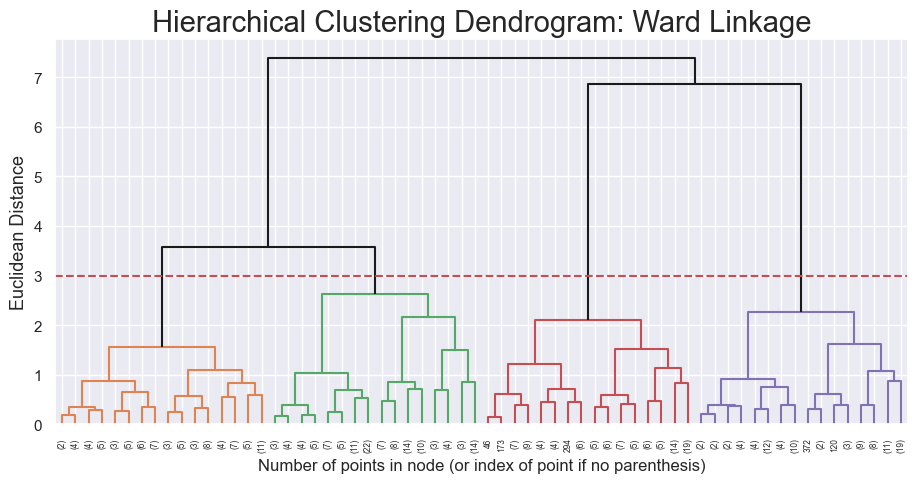

In [65]:
# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 3
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering Dendrogram: {linkage.title()} Linkage', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

### Test Cluster Solution

In [66]:
linkage = 'ward'
distance = 'euclidean'
n_clusters = 3

hc3_clust = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=n_clusters)
hc3_labels = hc3_clust.fit_predict(km_prefil)

In [67]:
df_clusters_concat = pd.concat([df_selected_1, 
                       pd.Series(km_labels, 
                                 name='KM_labels', 
                                 index=df_selected_1.index)], 
                    axis=1)

df_clusters_concat.groupby('KM_labels').mean()

,customer_age,first_order,last_order,dif_order
KM_labels,,,,
0,0.250878,0.603062,0.608749,0.200998
1,0.157525,0.197746,0.932126,0.786555
2,0.174625,0.062049,0.361760,0.437268
3,0.162414,0.921623,0.925948,0.199904
4,0.105385,0.522083,0.825972,0.440625
...,...,...,...,...
395,0.235198,0.011616,0.696128,0.746483
396,0.182449,0.246479,0.681377,0.545900
397,0.683761,0.207407,0.411111,0.360119


In [68]:
# Joining the label gotten from the hierarchical clustering on top of k-means, associated to each k-means label
kmhc_perfil3 = df_clusters_concat.merge(pd.concat((km_prefil, pd.Series(hc3_labels)), axis=1).iloc[:,4], left_on='KM_labels',right_index=True, how='left')
kmhc_perfil3.rename(columns={0:'HC_label'},inplace=True)

In [69]:
kmhc_perfil3.drop(columns='KM_labels').groupby('HC_label').mean()

,customer_age,first_order,last_order,dif_order
HC_label,,,,
0,0.193516,0.201444,0.832442,0.703481
1,0.190328,0.723185,0.786432,0.247251
2,0.189422,0.205745,0.299461,0.271736


In [70]:
n_clusters= 4

hc4_clust = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=n_clusters)
hc4_labels = hc4_clust.fit_predict(km_prefil)

In [71]:
# Joining the label gotten from the hierarchical clustering on top of k-means, associated to each k-means label
kmhc_perfil4 = df_clusters_concat.merge(pd.concat((km_prefil, pd.Series(hc4_labels)), axis=1).iloc[:,4], left_on='KM_labels',right_index=True, how='left')
kmhc_perfil4.rename(columns={0:'HC_label'},inplace=True)

In [72]:
kmhc_perfil4.drop(columns='KM_labels').groupby('HC_label').mean()

,customer_age,first_order,last_order,dif_order
HC_label,,,,
0,0.198155,0.102281,0.846184,0.794208
1,0.190328,0.723185,0.786432,0.247251
2,0.189422,0.205745,0.299461,0.271736
3,0.185091,0.381573,0.807480,0.538675


In [73]:
## See crosstab 

pd.crosstab(kmhc_perfil4['HC_label'], kmhc_perfil3['HC_label'])

HC_label,0,1,2
HC_label,,,
0,10939,0,0
1,0,7140,0
2,0,0,6991
3,6022,0,0


The cluster 0 of `kmhc_perfil4` corresponds to cluster 1 of `kmhc_perfil3`, and cluster 2 of `kmhc_perfil4` corresponds to cluster 2 of `kmhc_perfil3`. Cluster 0 of `kmhc_perfil3` is divided between clusters 1 and 3 of `kmhc_perfil4`.


Based on the analysis of R2, dendrograms, and the crosstab matrix, we conclude that the optimal number of clusters is 3.

### Final Hierarchical clustering solution

In [74]:
kmhc_perfil_final= kmhc_perfil3.drop(columns='KM_labels').groupby('HC_label').mean()
kmhc_perfil_final

,customer_age,first_order,last_order,dif_order
HC_label,,,,
0,0.193516,0.201444,0.832442,0.703481
1,0.190328,0.723185,0.786432,0.247251
2,0.189422,0.205745,0.299461,0.271736


The variable  `customer_age` exhibits minimal variation across clusters (with mean values ranging from 0.189 to 0.194), indicating that age does not play a significant role in differentiating the identified groups.

- Cluster 0: A group of highly loyal and recurrent customers, with a long history of purchases that began at the start of the analyzed period and who remain active until the end.
- Cluster 1: Comprised of customers who made their first purchase during an intermediate period and exhibit a small difference between the time of their first and last purchases, suggesting low recurrence.
- Cluster 2: Includes customers who made purchases early in the analyzed period but are no longer active, displaying low loyalty and recurrence.

<a class="anchor" id="section_3_2">
    
## 3.2  Purchasing Patterns Perspective
    
</a>

In [75]:
unique_points = pd.DataFrame(df_selected_2).drop_duplicates().shape[0]
print(f"Maximum number of possible clusters: {unique_points}")

Maximum number of possible clusters: 306


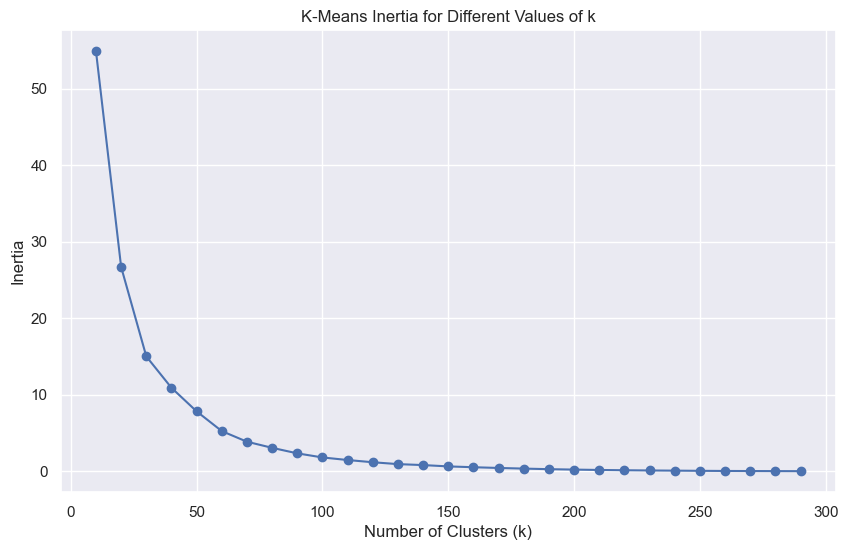

In [76]:
inertia(df_selected_2, start=10, end=300, step= 10)

In [77]:
kmeans = KMeans(n_clusters=50, init='k-means++',n_init=15,random_state=42)

# Fit the KMeans algorithm to the data (df_selected_1), predict cluster labels and extract the cluster centers 
km_labels = kmeans.fit_predict(df_selected_2)  
clust_centers = kmeans.cluster_centers_

km_purchasing=df_selected_2.copy()
# Add a new column to the copied DataFrame containing the cluster labels (0- 199)
km_purchasing['kmeans_labels']= km_labels
# Group by the 'kmeans_labels' column and calculate the mean for each cluster
km_purchasing = km_purchasing.groupby("kmeans_labels").mean()

In [78]:
hc_methods = ["ward", "complete", "average", "single"]
max_nclus = 10

r2_hc = np.vstack([ get_r2_hc(km_purchasing, 
                              link, 
                              max_nclus=max_nclus, 
                              min_nclus=1, 
                              dist="euclidean") 
                              for link in hc_methods])
r2_hc_methods = pd.DataFrame(r2_hc.T, index=range(1, max_nclus + 1), columns=hc_methods)


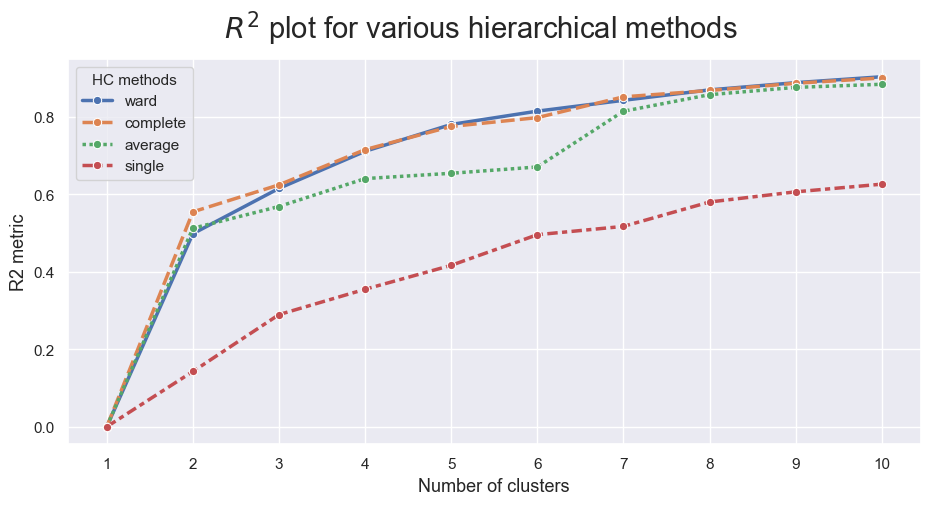

In [79]:
# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

fig.suptitle("$R^2$ plot for various hierarchical methods", fontsize=21)

plt.show()

Despite the competitiveness between the Ward and Complete methods, the Ward method demonstrates superior performance. The optimal number of clusters appears to range from 2 to 4

### Defining the number of clusters:

In [80]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'ward'
distance = 'euclidean'

hclust = AgglomerativeClustering(linkage=linkage, metric=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(km_purchasing)


# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)


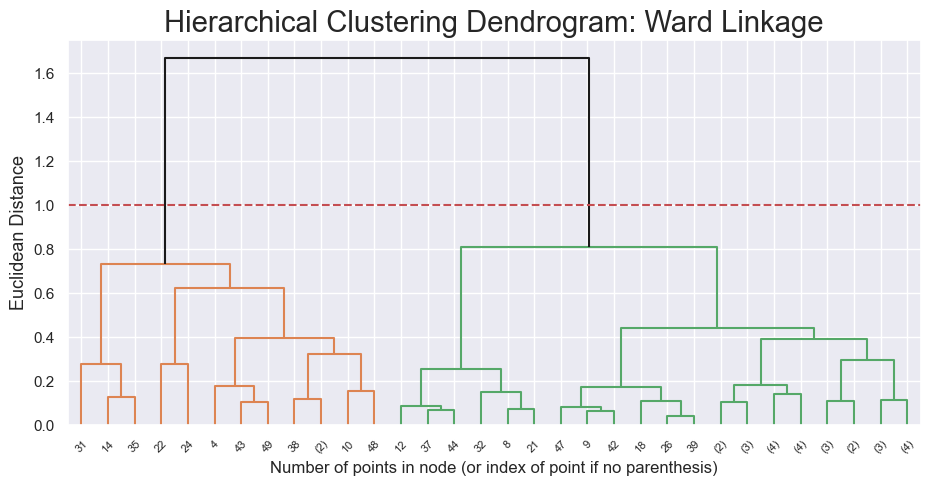

In [81]:
# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 1
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering Dendrogram: {linkage.title()} Linkage', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

### Test Cluster Solution

In [82]:
linkage = 'ward'
distance = 'euclidean'
n_clusters = 2

hc2_clust = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=n_clusters)
hc2_labels = hc2_clust.fit_predict(km_purchasing)


In [83]:
df_clusters_concat = pd.concat([df_selected_2, 
                       pd.Series(km_labels, 
                                 name='KM_labels', 
                                 index=df_selected_1.index)], 
                    axis=1)

df_clusters_concat.groupby('KM_labels').mean()

,tot_work_days,tot_leisure_days
KM_labels,,
0,0.153846,0.000000
1,0.076923,0.034483
2,0.275581,0.237801
3,0.000000,0.033111
4,0.640443,0.233542
5,0.085113,0.188803
6,0.153846,0.082769
7,0.038462,0.034483
8,0.408699,0.086368


In [84]:
# Joining the label gotten from the hierarchical clustering on top of k-means, associated to each k-means label
kmhc_purchasing2 = df_clusters_concat.merge(pd.concat((km_purchasing, pd.Series(hc2_labels)), axis=1).iloc[:,2], left_on='KM_labels',right_index=True, how='left')
kmhc_purchasing2.rename(columns={0:'HC_label'},inplace=True)

In [85]:
kmhc_purchasing2.drop(columns='KM_labels').groupby('HC_label').mean()

,tot_work_days,tot_leisure_days
HC_label,,
0,0.075736,0.052367
1,0.372145,0.295362


In [86]:
linkage = 'ward'
distance = 'euclidean'
n_clusters = 3

hc3_clust = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=n_clusters)
hc3_labels = hc3_clust.fit_predict(km_purchasing)

In [87]:
# Joining the label gotten from the hierarchical clustering on top of k-means, associated to each k-means label
kmhc_purchasing3 = df_clusters_concat.merge(pd.concat((km_purchasing, pd.Series(hc3_labels)), axis=1).iloc[:,2], left_on='KM_labels',right_index=True, how='left')
kmhc_purchasing3.rename(columns={0:'HC_label'},inplace=True)

In [88]:
kmhc_purchasing3.drop(columns='KM_labels').groupby('HC_label').mean()

,tot_work_days,tot_leisure_days
HC_label,,
0,0.372145,0.295362
1,0.065707,0.051817
2,0.307048,0.065061


In [89]:
# See crosstab 

pd.crosstab(kmhc_purchasing2['HC_label'], kmhc_purchasing3['HC_label'])

HC_label,0,1,2
HC_label,,,
0,0,28922,1254
1,916,0,0


### Final Hierarchical clustering solution

Despite the "biggest jump" in the dendrograms being for k=2, we decided to maintain 3 clusters since a group emerges that has a value of orders on weekdays much higher than the number of orders made on leisure days

In [90]:
kmhc_purchasing_final= kmhc_purchasing3.drop(columns='KM_labels').groupby('HC_label').mean()
kmhc_purchasing_final

,tot_work_days,tot_leisure_days
HC_label,,
0,0.372145,0.295362
1,0.065707,0.051817
2,0.307048,0.065061


CONCLUSIONS:
- Cluster 0: Represents a group that demonstrates a balanced purchasing behavior for food on both workdays and leisure days, with a slight preference for purchasing on workdays.
- Cluster 1: Characterized by extremely low values for both indicators, suggesting a group that is largely inactive or minimally engaged in food purchasing activities.
- Cluster 2: Displays moderately low purchasing activity on workdays and very low activity on leisure days, indicating a tendency to prioritize food purchases primarily on workdays.

<a class="anchor" id="section_3_3">
    
## 3.3   Customer Behavior Perspective
    
</a>

In [91]:
unique_points = pd.DataFrame(df_selected_3).drop_duplicates().shape[0]
print(f"Maximum number of possible clusters: {unique_points}")

Maximum number of possible clusters: 3417


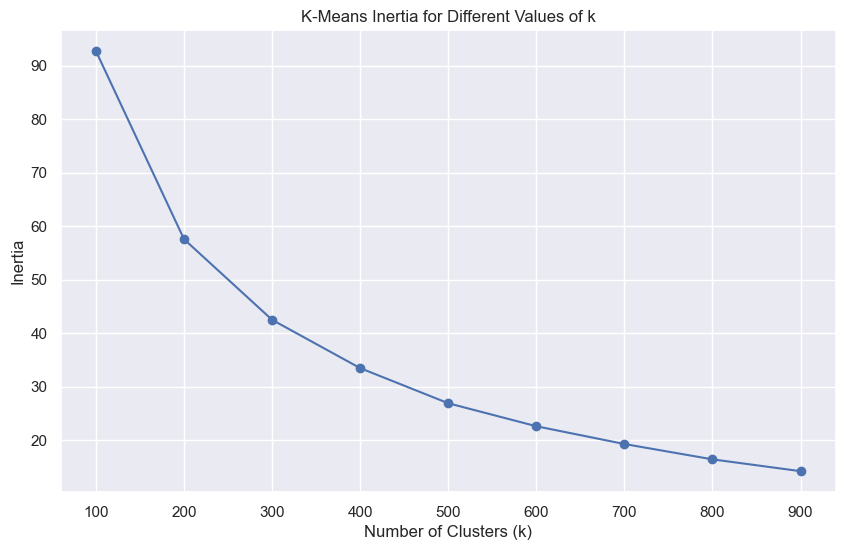

In [92]:
inertia(df_selected_3, 100, end=1000, step=100)

In [93]:
kmeans = KMeans(n_clusters=300, init='k-means++',n_init=15,random_state=42)

# Fit the KMeans algorithm to the data (df_selected_1), predict cluster labels and extract the cluster centers 
km_labels = kmeans.fit_predict(df_selected_3)  
clust_centers = kmeans.cluster_centers_

km_customer=df_selected_3.copy()
# Add a new column to the copied DataFrame containing the cluster labels (0- 199)
km_customer['kmeans_labels']= km_labels
# Group by the 'kmeans_labels' column and calculate the mean for each cluster
km_customer = km_customer.groupby("kmeans_labels").mean()

In [94]:
hc_methods = ["ward", "complete", "average", "single"]
max_nclus = 10

r2_hc = np.vstack([ get_r2_hc(km_customer, 
                              link, 
                              max_nclus=max_nclus, 
                              min_nclus=1, 
                              dist="euclidean") 
                              for link in hc_methods])
r2_hc_methods = pd.DataFrame(r2_hc.T, index=range(1, max_nclus + 1), columns=hc_methods)


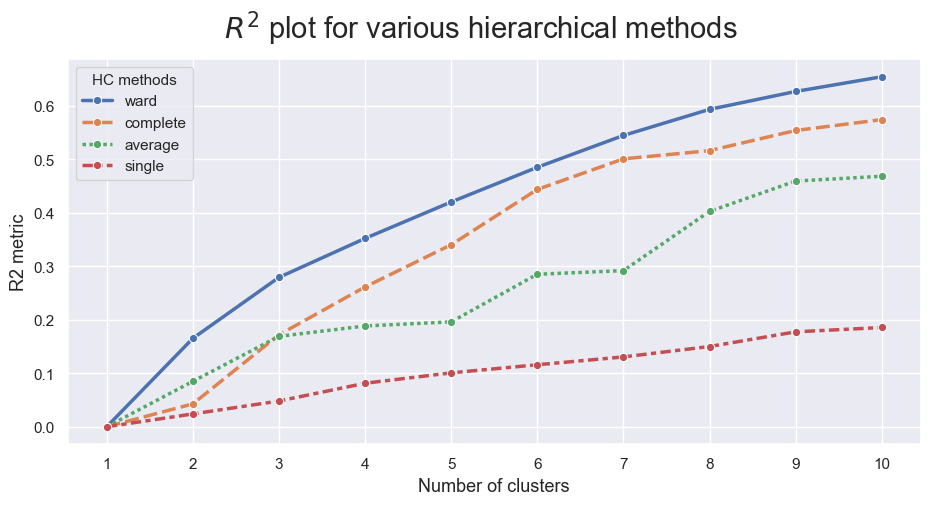

In [95]:
# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

fig.suptitle("$R^2$ plot for various hierarchical methods", fontsize=21)

plt.show()

The optimal number of clusters appears to be 3, determined using the Ward method, for the same reasons as in previous analyses.

### Defining the number of clusters:

In [96]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'ward'
distance = 'euclidean'

hclust = AgglomerativeClustering(linkage=linkage, metric=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(km_customer)


# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)


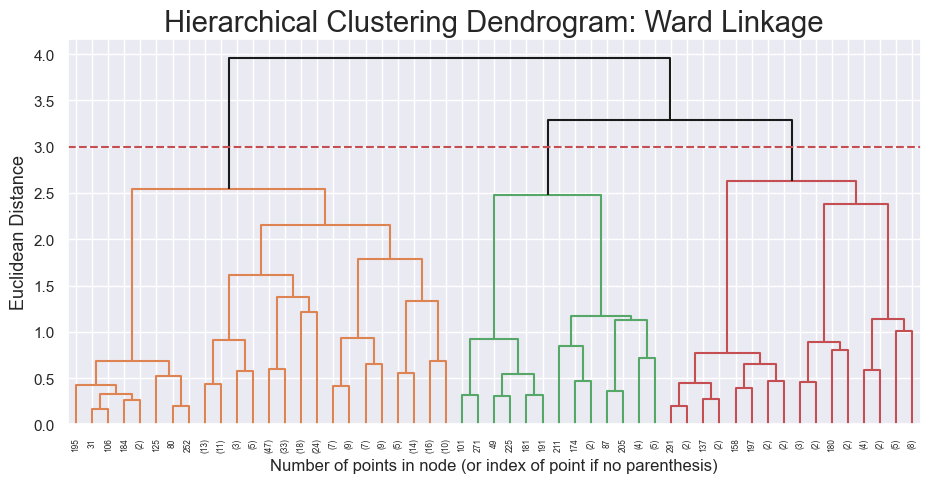

In [97]:
# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 3
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering Dendrogram: {linkage.title()} Linkage', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

The ideal number of clusters seems to be 3, as it maintains a significant separation between the groups without compromising the quality of the segmentation.

### Final Hierarchical clustering solution

In [98]:
linkage = 'ward'
distance = 'euclidean'
n_clusters = 3

hc3_clust = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=n_clusters)
hc3_labels = hc3_clust.fit_predict(km_customer)

df_clusters_concat = pd.concat([df_selected_3, 
                       pd.Series(km_labels, 
                                 name='KM_labels', 
                                 index=df_selected_1.index)], 
                    axis=1)

df_clusters_concat.groupby('KM_labels').mean()

,tot_early_morning,tot_breakfast,tot_lunch,tot_afternoon,tot_dinner,tot_late_night
KM_labels,,,,,,
0,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000
1,0.000000,0.000000,0.052632,0.000000,0.050000,0.000000
2,0.000000,0.196875,0.032895,0.178125,0.196875,0.007812
3,0.001385,0.057895,0.142659,0.050000,0.215789,0.000000
4,0.105263,0.050000,0.000000,0.002607,0.001896,0.000000
...,...,...,...,...,...,...
295,0.003036,0.058654,0.188259,0.060577,0.116346,0.000000
296,0.003589,0.120455,0.105263,0.198864,0.007955,0.000000
297,0.004423,0.000000,0.105263,0.100000,0.014706,0.000000


In [99]:
# Joining the label gotten from the hierarchical clustering on top of k-means, associated to each k-means label
kmhc_customer = df_clusters_concat.merge(pd.concat((km_customer, pd.Series(hc3_labels)), axis=1).iloc[:,6], left_on='KM_labels',right_index=True, how='left')
kmhc_customer.rename(columns={0:'HC_label'},inplace=True)

In [100]:
kmhc_customer.drop(columns='KM_labels').groupby('HC_label').mean()

,tot_early_morning,tot_breakfast,tot_lunch,tot_afternoon,tot_dinner,tot_late_night
HC_label,,,,,,
0,0.028225,0.295268,0.259339,0.339432,0.093375,0.011041
1,0.021450,0.035160,0.050404,0.043234,0.031793,0.009569
2,0.010691,0.035937,0.206414,0.124609,0.547656,0.132812


- Cluster 0: It exhibits a more consistent pattern of orders during the afternoon and breakfast periods, with lower activity in the early morning and late-night hours.
- Cluster 1: Represents customers with a low frequency of orders across all periods of the day, suggesting lower engagement or more sporadic habits.
- Cluster 2: Characterized by increased activity starting from lunchtime, with a particular focus on the dinner period.

<a class="anchor" id="section_3_4">
    
## 3.4   Culinary Preferences Perspective
    
</a>

In [101]:
unique_points = pd.DataFrame(df_selected_4).drop_duplicates().shape[0]
print(f"Maximum number of possible clusters: {unique_points}")

Maximum number of possible clusters: 26067


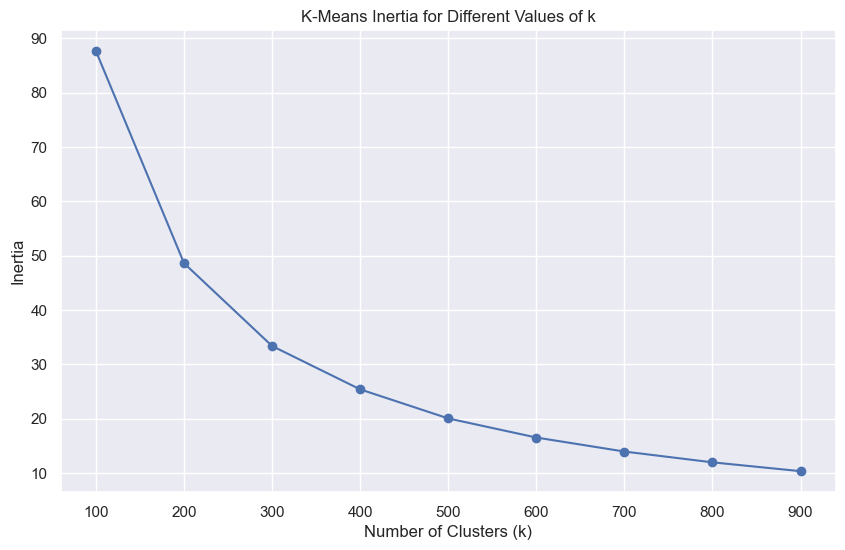

In [102]:
inertia(df_selected_4, 100, end=1000, step=100)

In [103]:
kmeans = KMeans(n_clusters=400, init='k-means++',n_init=15,random_state=42)

# Fit the KMeans algorithm to the data (df_selected_4), predict cluster labels and extract the cluster centers 
km_labels = kmeans.fit_predict(df_selected_4) 
clust_centers = kmeans.cluster_centers_

km_culinary=df_selected_4.copy()
# Add a new column to the copied DataFrame containing the cluster labels (0- 199)
km_culinary['kmeans_labels']= km_labels
# Group by the 'kmeans_labels' column and calculate the mean for each cluster
km_culinary = km_culinary.groupby("kmeans_labels").mean()

In [104]:
hc_methods = ["ward", "complete", "average", "single"]
max_nclus = 10

r2_hc = np.vstack([ get_r2_hc(km_culinary, 
                              link, 
                              max_nclus=max_nclus, 
                              min_nclus=1, 
                              dist="euclidean") 
                              for link in hc_methods])
r2_hc_methods = pd.DataFrame(r2_hc.T, index=range(1, max_nclus + 1), columns=hc_methods)


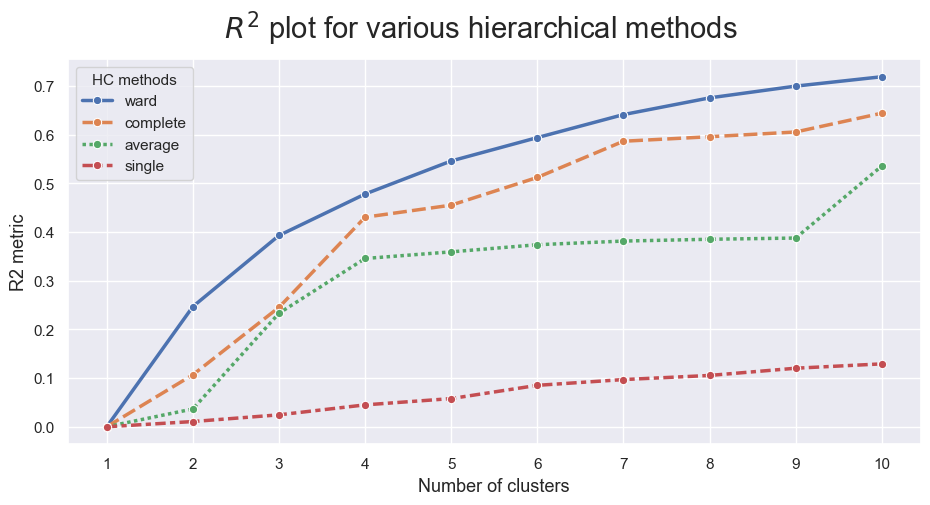

In [105]:
# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

fig.suptitle("$R^2$ plot for various hierarchical methods", fontsize=21)

plt.show()

The optimal number of clusters appears to be 3 or 4, determined using the Ward method, for the same reasons as in previous analyses.

### Defining the number of clusters:

In [106]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'ward'
distance = 'euclidean'

hclust = AgglomerativeClustering(linkage=linkage, metric=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(km_culinary)


# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)


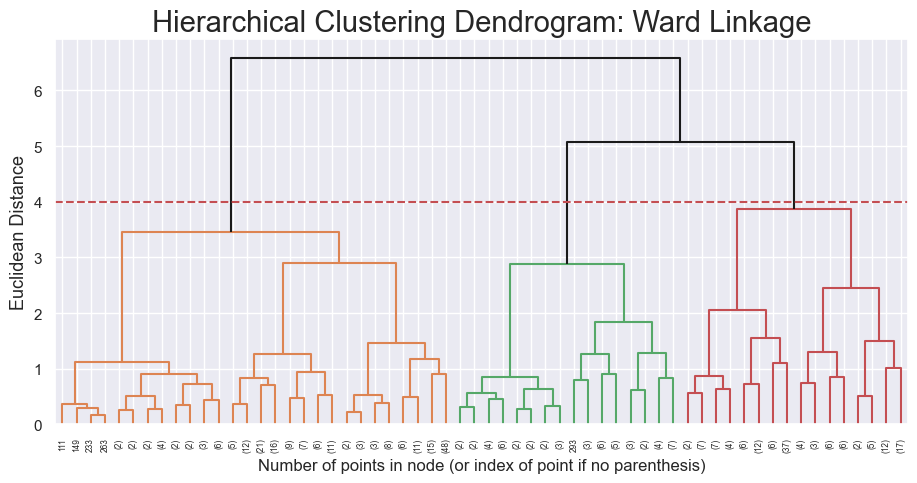

In [107]:
# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 4
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering Dendrogram: {linkage.title()} Linkage', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

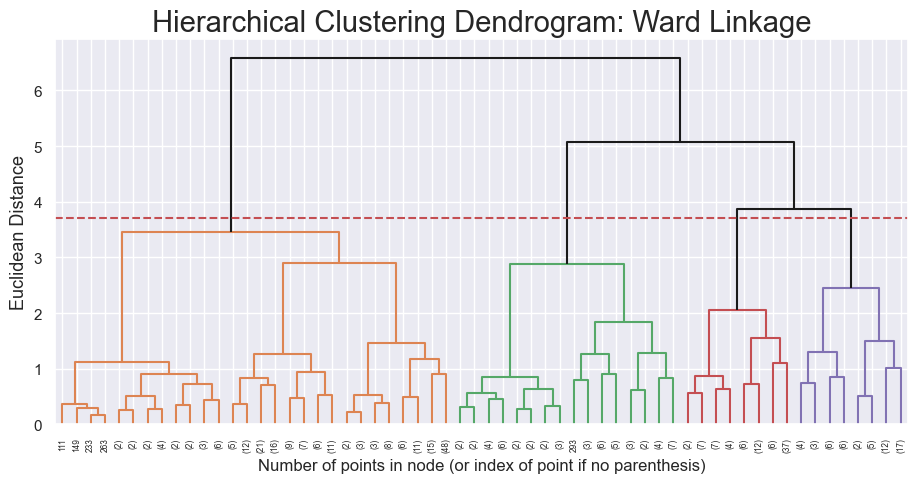

In [108]:
# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 3.7
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering Dendrogram: {linkage.title()} Linkage', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

### Test Cluster Solution

In [109]:
linkage = 'ward'
distance = 'euclidean'
n_clusters = 4

hc4_clust = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=n_clusters)
hc4_labels = hc4_clust.fit_predict(km_culinary)


In [110]:
df_clusters_concat = pd.concat([df_selected_4, 
                       pd.Series(km_labels, 
                                 name='KM_labels', 
                                 index=df_selected_1.index)], 
                    axis=1)

df_clusters_concat.groupby('KM_labels').mean()

,tot_western_cuisines,tot_oriental_cuisines,tot_other_cuisines,purchased_cuisines,tot_CUI
KM_labels,,,,,
0,0.000000,0.097846,0.000000,0.166667,0.051633
1,0.203228,0.127786,0.012973,0.666667,0.177816
2,0.026717,0.023843,0.000000,0.333333,0.026552
3,0.014069,0.015605,0.080136,0.666667,0.041055
4,0.020016,0.426677,0.096944,0.500000,0.266428
...,...,...,...,...,...
395,0.044543,0.069515,0.042994,0.500000,0.073635
396,0.151667,0.244249,0.091654,0.666667,0.237316
397,0.187986,0.910281,0.400560,1.000000,0.705930


In [111]:
# Joining the label gotten from the hierarchical clustering on top of k-means, associated to each k-means label
kmhc_culinary4 = df_clusters_concat.merge(pd.concat((km_culinary, pd.Series(hc4_labels)), axis=1).iloc[:,5], left_on='KM_labels',right_index=True, how='left')
kmhc_culinary4.rename(columns={0:'HC_label'},inplace=True)

In [112]:
kmhc_culinary4.drop(columns='KM_labels').groupby('HC_label').mean()

,tot_western_cuisines,tot_oriental_cuisines,tot_other_cuisines,purchased_cuisines,tot_CUI
HC_label,,,,,
0,0.045147,0.052858,0.033050,0.316977,0.062001
1,0.067277,0.105469,0.387249,0.556701,0.213887
2,0.132134,0.556654,0.079651,0.534082,0.388144
3,0.087815,0.125381,0.125205,0.888612,0.151864


In [113]:
linkage = 'ward'
distance = 'euclidean'
n_clusters = 3

hc3_clust = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=n_clusters)
hc3_labels = hc3_clust.fit_predict(km_culinary)


In [114]:
# Joining the label gotten from the hierarchical clustering on top of k-means, associated to each k-means label
kmhc_culinary3 = df_clusters_concat.merge(pd.concat((km_culinary, pd.Series(hc3_labels)), axis=1).iloc[:,5], left_on='KM_labels',right_index=True, how='left')
kmhc_culinary3.rename(columns={0:'HC_label'},inplace=True)

In [115]:
kmhc_culinary3.drop(columns='KM_labels').groupby('HC_label').mean()

,tot_western_cuisines,tot_oriental_cuisines,tot_other_cuisines,purchased_cuisines,tot_CUI
HC_label,,,,,
0,0.082197,0.119934,0.196892,0.797811,0.168832
1,0.045147,0.052858,0.033050,0.316977,0.062001
2,0.132134,0.556654,0.079651,0.534082,0.388144


In [116]:
# See crosstab 

pd.crosstab(kmhc_culinary4['HC_label'], kmhc_culinary3['HC_label'])

HC_label,0,1,2
HC_label,,,
0,0,28165,0
1,679,0,0
2,0,0,445
3,1803,0,0


Based on the dendrogram, dividing the customers into 3 clusters appears to be a better choice than dividing them into 4. Additionally, when splitting into 4 clusters, there are no significant differences between clusters 1 and 3, making the extra division less meaningful. Therefore, we have decided to group the customers into 3 clusters to ensure a more effective and interpretable segmentation.

### Final Hierarchical clustering solution

In [117]:
kmhc_culinary_final= kmhc_culinary3.drop(columns='KM_labels').groupby('HC_label').mean()
kmhc_culinary_final

,tot_western_cuisines,tot_oriental_cuisines,tot_other_cuisines,purchased_cuisines,tot_CUI
HC_label,,,,,
0,0.082197,0.119934,0.196892,0.797811,0.168832
1,0.045147,0.052858,0.033050,0.316977,0.062001
2,0.132134,0.556654,0.079651,0.534082,0.388144


- Cluster 0: This cluster represents customers who order a large volume of food but tend to spend relatively little on any specific type of cuisine. This suggests they are likely opting for cheaper options.
- Cluster 1: This cluster represents customers with low overall consumption of cuisines, who also prefer cheaper options. They appear to be low-engagement customers who make infrequent purchases, likely with undefined gastronomic preferences or occasional consumption patterns.
- Cluster 2: This cluster consists of customers who spend significantly on oriental cuisine, with very high values in this category. They also consume a relatively low amount of western cuisine and have minimal spending on other types of cuisine. However, they purchase from a relatively high number of different cuisines.


<div class="alert alert-block alert-success">
<a class="anchor" id="section_4">
    
# 4. K-Means Clustering
    
</a>
<div>

In [12]:
# Iterar pelas categorias e ajustar o modelo
for category, features in categories.items():
    kmclust = KMeans(n_clusters = 3, init='k-means++', n_init = 15, random_state=1)
    kmclust.fit(df[features])
    df[f'{category}_cluster'] = kmclust.predict(df[features])
    

In [13]:
# Characterizing the final clusters by grouping by the cluster label and calculating the mean of each feature for each cluster
def characterize_clusters(group_features, cluster_labels, df):
    # Concatenate the cluster labels with the original features
    df_concat = pd.concat((df[group_features], pd.Series(cluster_labels, name='labels', index=df.index)), axis=1)
    
    # Group by the cluster label and calculate the mean of each feature for each cluster
    return df_concat.groupby('labels').mean()

### Inertia Method

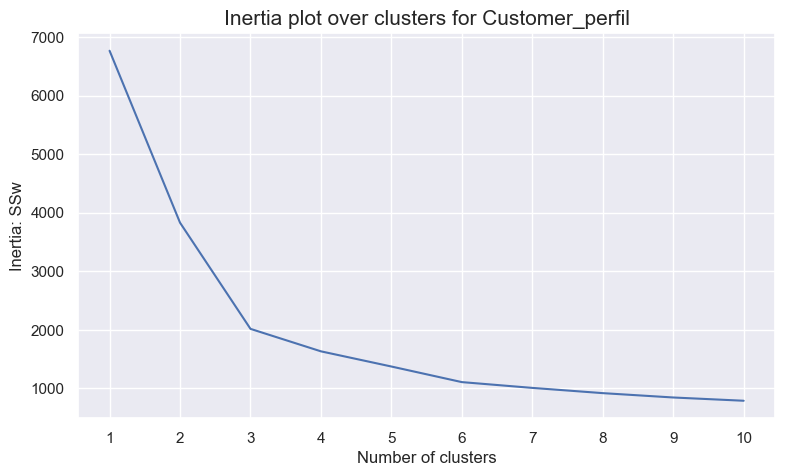

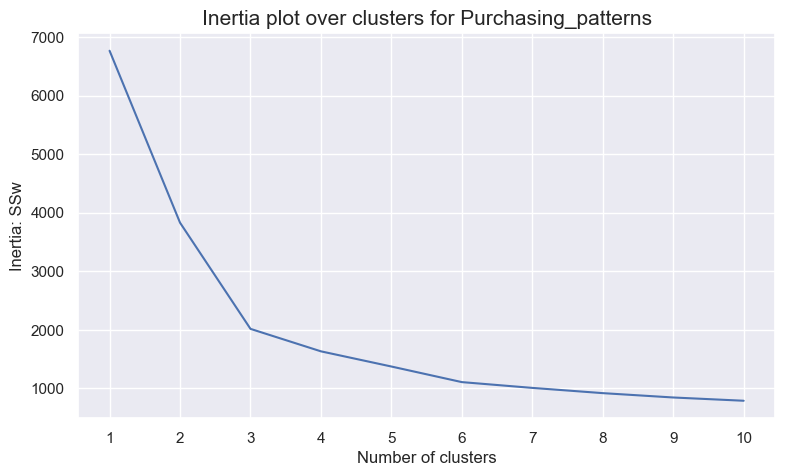

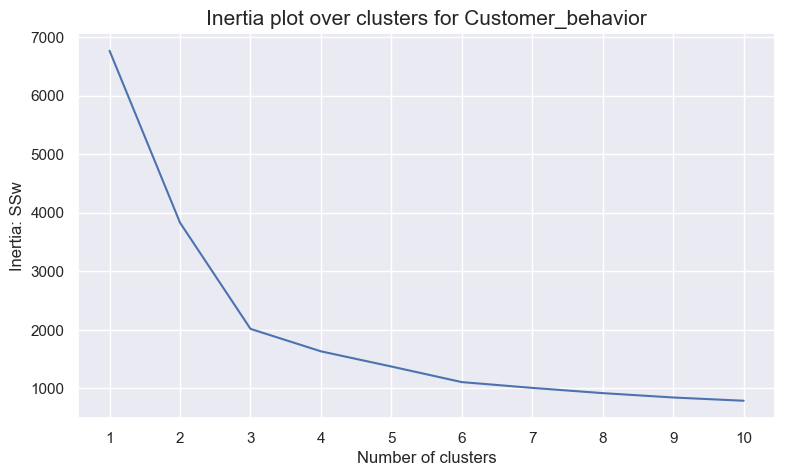

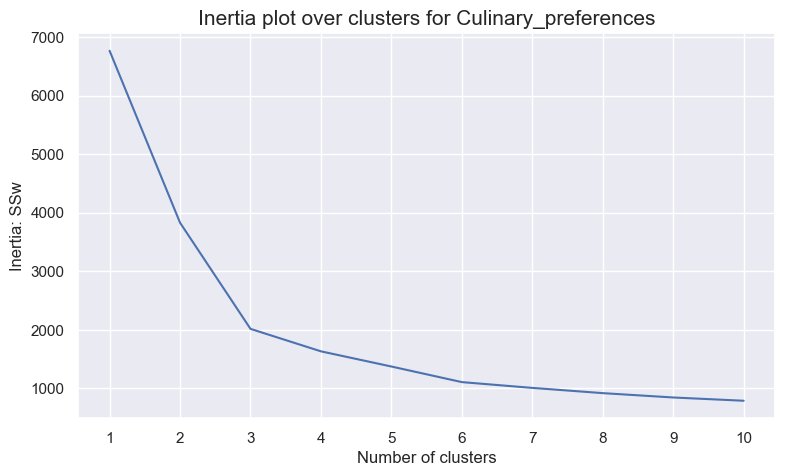

In [14]:
# Column groups
groups = {
    'Customer_perfil': Customer_perfil,
    'Purchasing_patterns': Purchasing_patterns,
    'Customer_behavior': Customer_behavior,
    'Culinary_preferences': Culinary_preferences
}

for group_name, columns in groups.items():
    inertia = []
    range_clusters = range(1,11)
    for n_clus in range_clusters:  # iterate over desired ncluster range
        kmclust = KMeans(n_clusters=n_clus, init='random', n_init=15, random_state=1)
        kmclust.fit(df[Customer_perfil])
        inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution
    
    # Do the plot

    fig, ax = plt.subplots(figsize=(9,5))

    ax.plot(range_clusters, inertia)
    ax.set_xticks(range_clusters)
    ax.set_ylabel("Inertia: SSw")
    ax.set_xlabel("Number of clusters")
    ax.set_title(f"Inertia plot over clusters for {group_name}", size=15)

    plt.show()

After analyzing all the plots, we firmly conclude that the optimal number of clusters across all groups lies between **three and four**, with a strong preference for **three**. To confirm this, we tested various parameters for __`Customer_perfil`__ to see if there was any improvement.

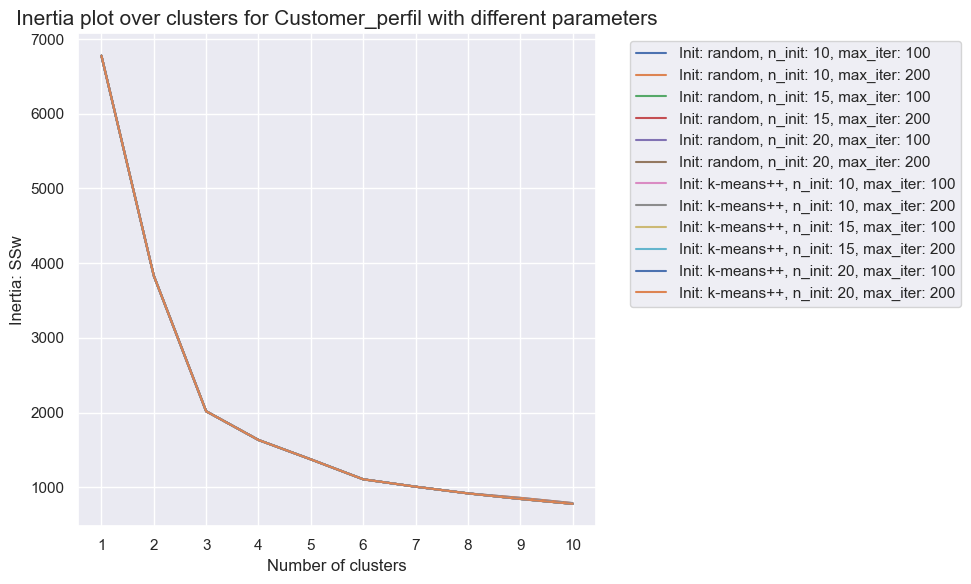

In [29]:
# Variables to store results
results = []
range_clusters = range(1, 11)  # Range of clusters to test

# Lists of parameters to test
inits = ['random', 'k-means++']
n_inits = [10, 15, 20]
max_iters = [100, 200]

# Loop to iterate over different parameters
for init_method in inits:
    for n_init_val in n_inits:
        for max_iter_val in max_iters:
            inertia = []  # List to store inertia values for different clusters
            for n_clus in range_clusters:
                # Create and fit the KMeans model
                kmclust = KMeans(
                    n_clusters=n_clus,
                    init=init_method,
                    n_init=n_init_val,
                    max_iter=max_iter_val,
                    random_state=1
                )
                kmclust.fit(df[Customer_perfil])
                inertia.append(kmclust.inertia_)  # Save the inertia
                
            # Save the results in a list
            results.append({
                'init': init_method,
                'n_init': n_init_val,
                'max_iter': max_iter_val,
                'inertia': inertia
            })

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the inertia curves for each combination of parameters
for result in results:
    label = f"Init: {result['init']}, n_init: {result['n_init']}, max_iter: {result['max_iter']}"
    ax.plot(range_clusters, result['inertia'], label=label)

ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters for Customer_perfil with different parameters", size=15)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot

plt.tight_layout()
plt.show()


After analyzing the graphic, we conclude that other parameters did not influence our choice for the number of clusters, which remains at **three**.

In [15]:
df.head()


,customer_age,vendor_count,product_count,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,...,is_chain_Other Chains,last_promo_DISCOUNT,last_promo_FREEBIE,last_promo_NOPROMO,payment_method_CASH,payment_method_DIGI,Customer_perfil_cluster,Purchasing_patterns_cluster,Customer_behavior_cluster,Culinary_preferences_cluster
customer_id,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,0.046154,0.086957,0.079365,0.0,0.011111,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,2
5d272b9dcb,0.030769,0.086957,0.031746,0.0,0.011111,12.82,6.39,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0,0
f6d1b2ba63,0.353846,0.043478,0.031746,0.0,0.011111,9.20,0.00,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0,2
180c632ed8,0.169231,0.086957,0.047619,0.0,0.022222,0.00,13.70,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0
4eb37a6705,0.076923,0.086957,0.079365,0.0,0.022222,14.57,40.87,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0,0


<a class="anchor" id="section_4_1">
    
## 4.1  Customer Perfil Perspective
    
</a>

In [16]:
customer_perfil_characterization = characterize_clusters(Customer_perfil, df['Customer_perfil_cluster'], df)

# Display the results

print("Customer Perfil Clusters Characterization:")
print(customer_perfil_characterization)

Customer Perfil Clusters Characterization:
        customer_age  first_order  last_order  dif_order
labels                                                  
0           0.190212     0.211586    0.332727   0.293774
1           0.191963     0.154626    0.852442   0.757173
2           0.193176     0.673273    0.802319   0.300126


### **Clusters Analysis**

*Differences along the columns:*


__`Customer_age:`__ Across all clusters, the customer age does not differ, indicating that age is not a relevant feature for the clustering method.

__`first_order:`__  There is a slight decrease in the timing of first orders between cluster 0 and cluster 1, indicating that customers in cluster 1 placed their first orders earlier than those in cluster 0. In contrast, cluster 2 shows an increase compared to both clusters 1 and 0, suggesting that customers in cluster 2 start their purchases later than those in the other two clusters.

__`last_order:`__ Compared to cluster 0, clusters 1 and 2 show a significant increase, indicating that these customers placed their last orders later than those in cluster 0.

__`dif_order:`__  Cluster 0 shows the lowest value, indicating that its customers are the most regular compared to those in clusters 1 and 2. However, the difference between clusters 0 and 2 is minor, suggesting that customers in cluster 2 can also be regarded as fairly regular.


**Final Conclusions:** 


__`Cluster 0:`__ Although it has the lowest value in dif_order, the last_order was also small. This suggests that these customers might have been regular buyers for a while but are now considered inactive users, or they may have made only a few early purchases.

__`Cluster 1:`__ The customers in this cluster have the highest values in last_order but the lowest in first_order, indicating that they start making purchases early and remain active users. These customers are more likely reactivated or loyal regulars.

__`Cluster 2:`__ These customers have the highest values in last_order and first_order. This means they start purchasing later but remain active users. They are more likely to be new or reactivated customers.


<a class="anchor" id="section_4_2">
    
## 4.2  Purchasing Patterns Perspective
    
</a>

In [17]:
purchasing_patterns_characterization = characterize_clusters(Purchasing_patterns, df['Purchasing_patterns_cluster'], df)

# Display the results

print("\nPurchasing Patterns Clusters Characterization:")
print(purchasing_patterns_characterization)


Purchasing Patterns Clusters Characterization:
        tot_work_days  tot_leisure_days
labels                                 
0            0.044286          0.039504
1            0.383413          0.216985
2            0.161999          0.096267


*Differences along the columns:*


__`tot_work_days:`__ Cluster 1 has a higher value, indicating that customers in this cluster make more purchases on workdays compared to customers in clusters 0 and 2.

__`tot_leisure_days:`__  The same observation in tot_work_days can be applied to leisure days.


**Final Conclusions:** 


__`Cluster 0:`__ The customers in this cluster have the lowest values for workdays and leisure days, which may indicate that they are inactive or only occasional buyers.

__`Cluster 1:`__ In contrast to cluster 0, customers in this cluster have the highest values for both workdays and leisure days. However, the values for workdays are slightly higher, suggesting that they are more frequently engaged on these days. It appears that they are more likely to be professionals or business-oriented consumers.

__`Cluster 2:`__ The customers in this cluster purchase occasionally but less frequently than the customers in cluster 1. It appears that they might represent casual shoppers.

<a class="anchor" id="section_4_3">
    
## 4.3  Customer Behavior Perspective
    
</a>

In [18]:
customer_behavior_characterization = characterize_clusters(Customer_behavior, df['Customer_behavior_cluster'], df)

# Display the results

print("\nCustomer Behavior Clusters Characterization:")
print(customer_behavior_characterization)


Customer Behavior Clusters Characterization:
        tot_early_morning  tot_breakfast  tot_lunch  tot_afternoon  \
labels                                                               
0                0.023298       0.030026   0.032438       0.022801   
1                0.002627       0.035024   0.053485       0.227277   
2                0.025850       0.111980   0.242006       0.062125   

        tot_dinner  tot_late_night  
labels                              
0         0.024386        0.009098  
1         0.062123        0.006078  
2         0.096458        0.023627  


**Final Conclusions:** 


__`Cluster 0:`__ The customers in this cluster have the lowest values across all columns, indicating they may be inactive users.

__`Cluster 1:`__ In almost all the columns, these clusters show lower values, except in the column `tot_afternoon`, which indicates that customers in this cluster only make purchases in the afternoon.

__`Cluster 2:`__ The values in this cluster, like the previous ones, show lower figures across all columns. However, there are more frequent purchases from these customers during breakfast and lunch.

<a class="anchor" id="section_4_4">
    
## 4.4  Culinary Preferences Perspective
    
</a>

In [19]:
culinary_preferences_characterization = characterize_clusters(Culinary_preferences, df['Culinary_preferences_cluster'], df)

# Display the results

print("\nCulinary Preferences Clusters Characterization:")
print(culinary_preferences_characterization)


Culinary Preferences Clusters Characterization:
        tot_western_cuisines  tot_oriental_cuisines  tot_other_cuisines  \
labels                                                                    
0                   0.047750               0.059841            0.042233   
1                   0.101448               0.144287            0.119568   
2                   0.029241               0.038873            0.021576   

        purchased_cuisines   tot_CUI  
labels                                
0                 0.386873  0.069965  
1                 0.733280  0.167178  
2                 0.164703  0.042658  


**Final Conclusions:** 


__`Cluster 0:`__ The customers in this cluster show that they rarely purchase food from any cuisine category. However, among all cuisine types, the oriental cuisine was the most frequently purchased, though still at lower values compared to other clusters.

__`Cluster 1:`__ In this cluster, we can see that customers frequently eat from this type of food, purchasing most often from Western and other cuisines.

__`Cluster 2:`__ Customers in this cluster show greater interest in purchasing compared to those in cluster 0. However, they have made similar purchases across all cuisine types.

<div class="alert alert-block alert-success">
<a class="anchor" id="section_5">
    
# 5. Self-Organization Maps
    
</a>
<div>

## Self-Organizing Map (SOM) Grid Configuration

SOM organizes data in an **unsupervised manner**, mapping it onto a grid of predefined dimensions. This grid enables the grouping of similar data points into clusters.

###  Setting the SOM Grid Dimensions
The size of the grid is a crucial parameter, as it defines the number of potential "clusters" in the map. 

#### Heuristic Rule for Grid Dimensions:
The optimal grid size can be determined using the following formula:

\[
\text{Grid Dimension} = \sqrt{5 \times \sqrt{N}}
\]

Where **N** is the total number of data points in the dataset.

![image-2.png](attachment:image-2.png) 

## Purpose of Self-Organizing Maps (SOM)

Self-Organizing Maps (SOM) serve as a powerful data visualization technique designed to interpret and simplify high-dimensional data. By reducing the dimensionality of the data, SOM maps complex relationships into a 2D grid, making it easier to understand patterns and structures.

### Key Features of SOM:
- **Dimensionality Reduction**: 
  - SOM simplifies high-dimensional data by mapping it onto a lower-dimensional space while preserving the relationships and similarities among data points.
  
- **Clustering Representation**: 
  - It inherently groups similar data points together, visualizing clusters and highlighting natural groupings within the dataset.



In [29]:
categories = {
    'Customer_perfil': ['customer_age', 'first_order', 'last_order', 'dif_order'],
    'Purchasing_patterns': ['tot_work_days', 'tot_leisure_days'],
    'Customer_behavior': ['tot_early_morning', 'tot_breakfast', 'tot_lunch', 'tot_afternoon', 'tot_dinner', 'tot_late_night'],
    'Culinary_preferences': ['tot_western_cuisines', 'tot_oriental_cuisines', 'tot_other_cuisines', 'purchased_cuisines', 'tot_CUI']
}

# General SOUND configuration
M, N = 10, 10  
neighborhood_function = 'gaussian'
topology = 'hexagonal'
learning_rate = 0.7
random_seed = 42


for category, features in categories.items():
    print(f"\nTraining SOM for the category: {category}")
    
    
    valid_features = [col for col in features if col in df.columns]
    if not valid_features:
        print(f"Attention: No valid metrics found for {category}. Jumping...")
        continue

  
    som_data = df[valid_features].values
    n_feats = len(valid_features)

    # Initialize and train SOM
    sm = MiniSom(M, N, n_feats, 
                 learning_rate=learning_rate, 
                 topology=topology, 
                 neighborhood_function=neighborhood_function, 
                 activation_distance='euclidean', 
                 random_seed=random_seed)

    sm.random_weights_init(som_data)

    # Before training
    print("Before training:")
    print("QE:", np.round(sm.quantization_error(som_data), 4))
    print("TE:", np.round(sm.topographic_error(som_data), 4))

    # SOM training
    sm.train_batch(som_data, 20000)

    # After training
    print(" After training:")
    print("QE:", np.round(sm.quantization_error(som_data), 4))
    print("TE:", np.round(sm.topographic_error(som_data), 4))



Training SOM for the category: Customer_perfil
Before training:
QE: 0.0843


c:\Users\rcouc\anaconda3\Lib\site-packages\minisom.py:631: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


TE: 0.9096
 After training:
QE: 0.2419
TE: 0.2807

Training SOM for the category: Purchasing_patterns
Before training:
QE: 0.0108


c:\Users\rcouc\anaconda3\Lib\site-packages\minisom.py:631: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


TE: 0.985
 After training:
QE: 0.0039
TE: 0.0126

Training SOM for the category: Customer_behavior
Before training:
QE: 0.0459
TE: 0.9473
 After training:
QE: 0.0364
TE: 0.2294

Training SOM for the category: Culinary_preferences
Before training:
QE: 0.0493


c:\Users\rcouc\anaconda3\Lib\site-packages\minisom.py:631: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


TE: 0.9521
 After training:
QE: 0.0406
TE: 0.2342


In [11]:
# What are these weights?
weights = sm.get_weights()
weights.shape

(10, 10, 5)

In [12]:
def plot_hexagons(som,              
                  sf,               
                  colornorm,        
                  matrix_vals,      
                  label="",        
                  cmap=cm.viridis,  
                  annot=False):     
    
    axs = sf.subplots(1, 1)  # Create a subplot
    
    for i in range(matrix_vals.shape[0]):
        for j in range(matrix_vals.shape[1]):
            wx, wy = som.convert_map_to_euclidean((i, j))
            hex = RegularPolygon(
                (wx, wy),
                numVertices=6,
                radius=np.sqrt(1/3),
                facecolor=cmap(colornorm(matrix_vals[i, j])),
                alpha=1,
                edgecolor='white',
                linewidth=.5
            )
            axs.add_patch(hex)
            if annot:
                annot_val = np.round(matrix_vals[i, j], 2)
                axs.text(wx, wy, annot_val, ha='center', va='center', fontsize='x-small')
    
    axs.margins(0.05)
    axs.set_aspect('equal')
    axs.axis("off")
    axs.set_title(label)
    
    # Add colorbar
    divider = make_axes_locatable(axs)
    ax_cb = divider.append_axes("right", size="5%", pad=0.05)
    cmap_sm = cm.ScalarMappable(cmap=cmap, norm=colornorm)
    cb1 = colorbar.Colorbar(ax_cb, mappable=cmap_sm, orientation='vertical')
    cb1.ax.get_yaxis().labelpad = 6
    sf.add_axes(ax_cb)
    
    return sf



Viewing SOM for the category: Customer_perfil


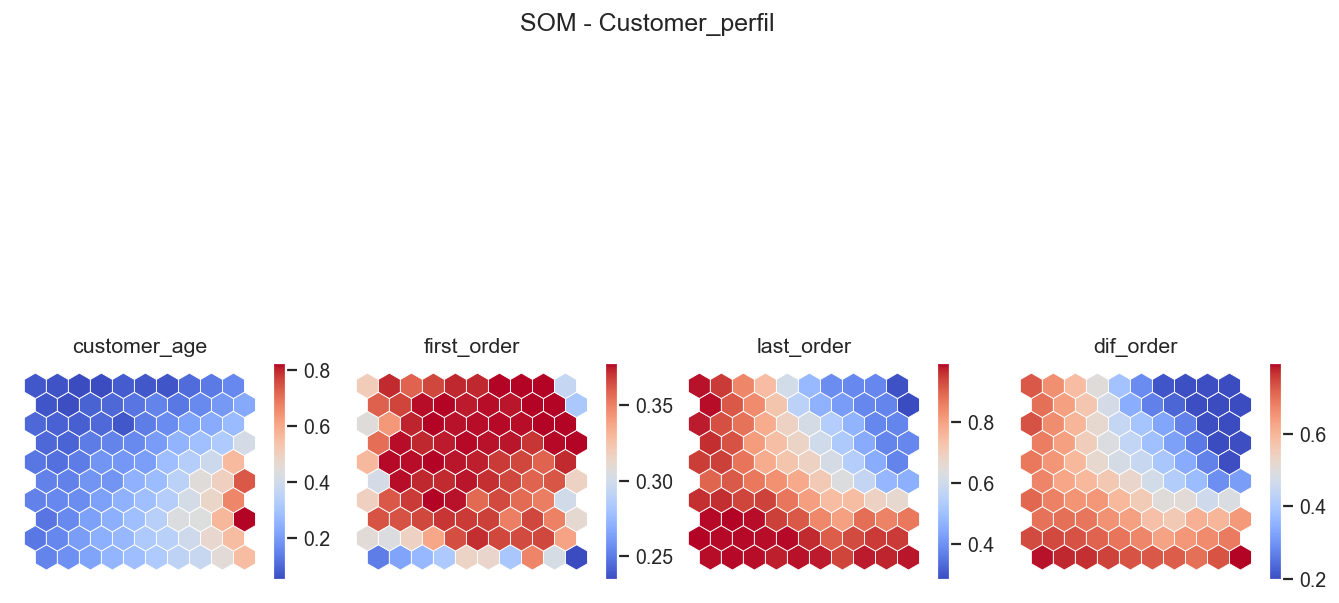


Viewing SOM for the category: Purchasing_patterns


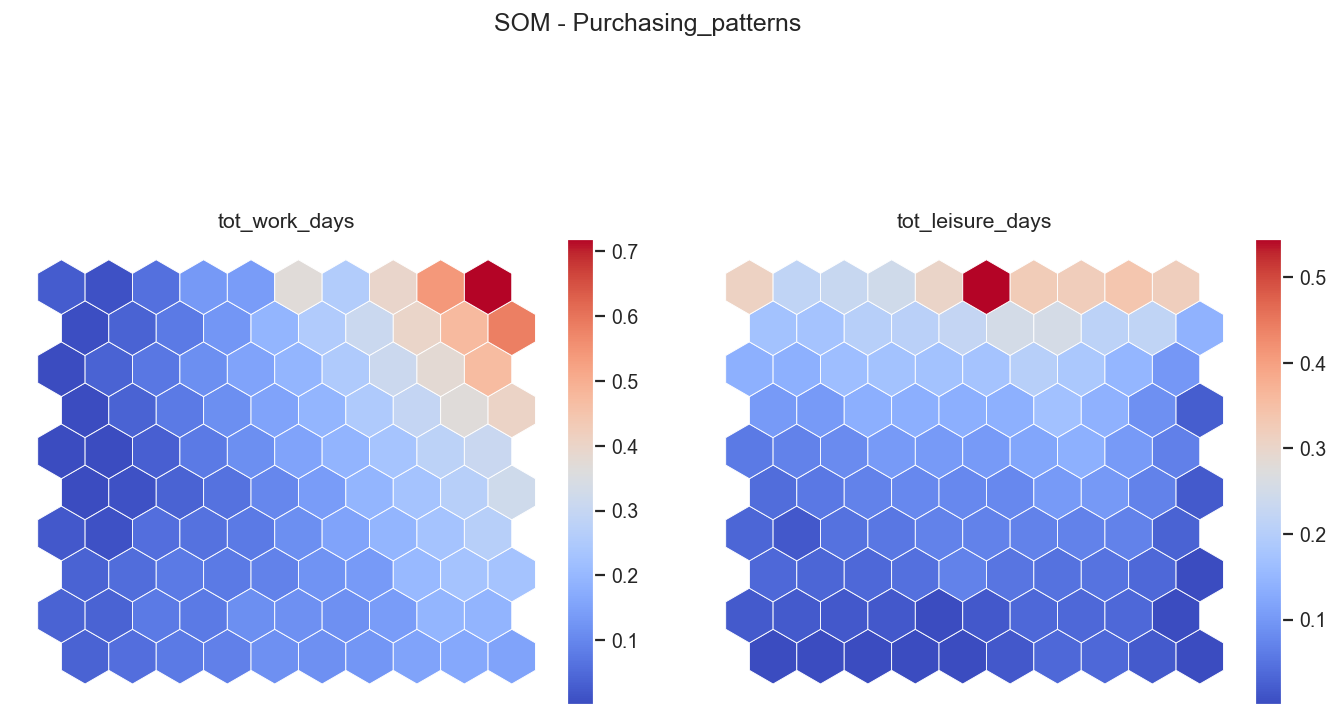


Viewing SOM for the category: Customer_behavior


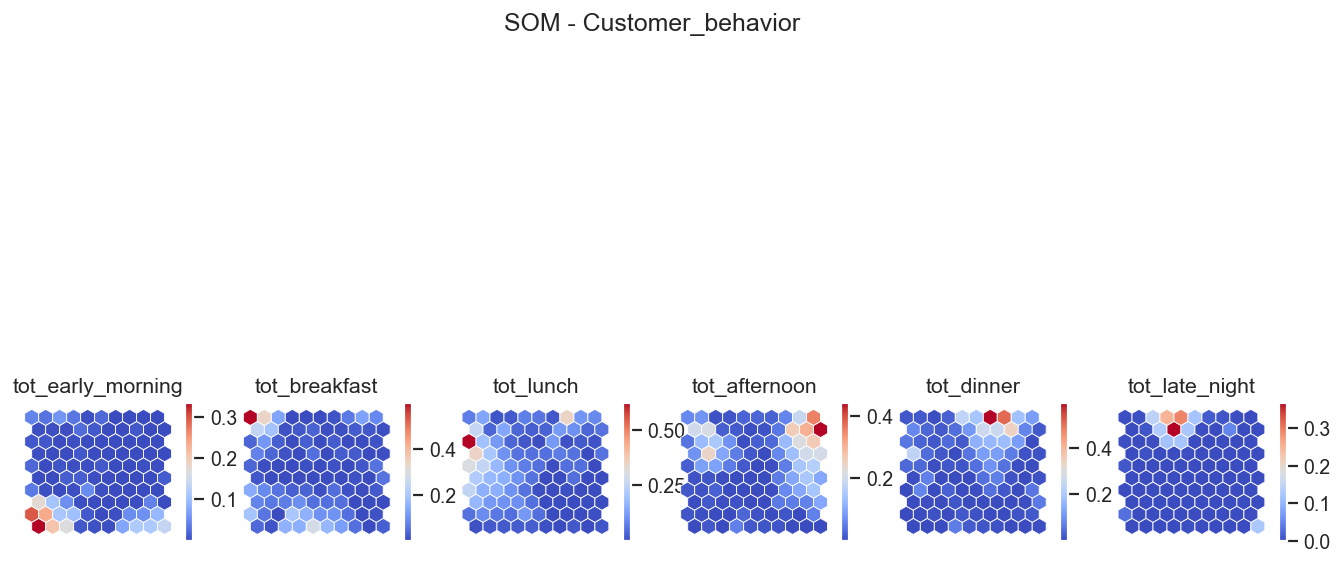


Viewing SOM for the category: Culinary_preferences


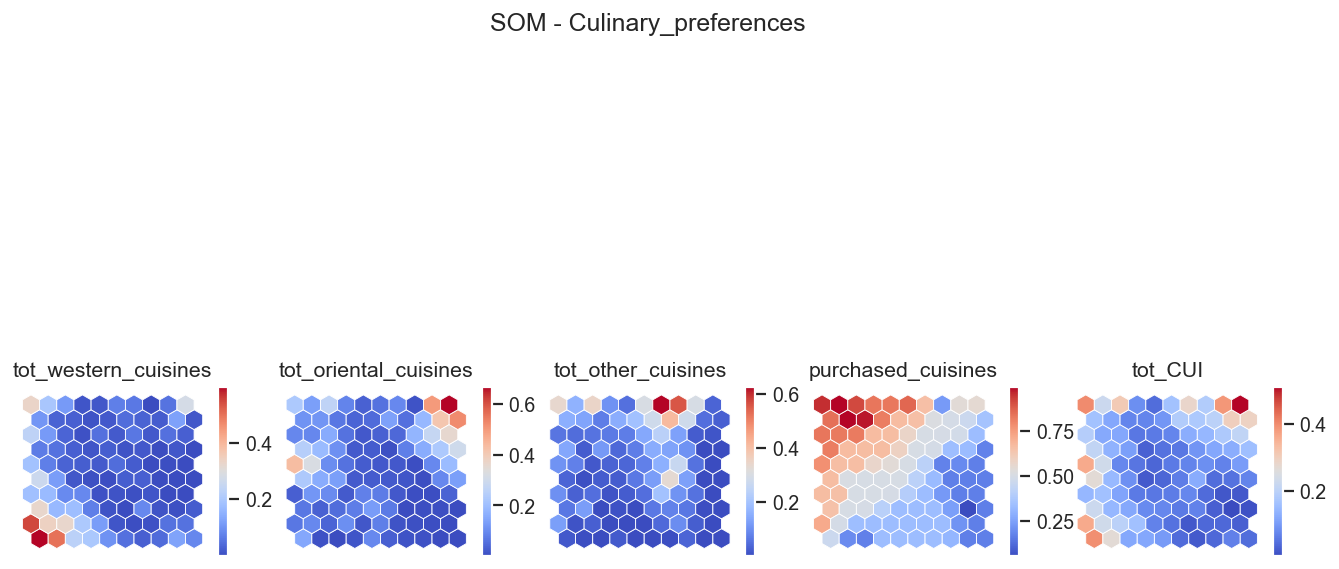

In [ ]:
figsize = (10, 7)
dpi = 128
colormap = cm.coolwarm

# Iterate over categories
for category, features in categories.items():
    print(f"\nViewing SOM for the category: {category}")

   
    valid_features = [col for col in features if col in df.columns]
    if not valid_features:
        print(f"Attention: No valid metrics found for {category}")
        continue

    # Prepare data and train SOM
    som_data = df[valid_features].values
    n_feats = len(valid_features)

    # Configure and train SOM
    sm = MiniSom(10, 10, n_feats, 
                 learning_rate=0.7, 
                 topology='hexagonal', 
                 neighborhood_function='gaussian', 
                 random_seed=42)
    sm.random_weights_init(som_data)
    sm.train_batch(som_data, 20000)

    # SOM weights for each metric
    weights = sm.get_weights()

    # Create figure for metrics in this category
    fig = plt.figure(figsize=figsize, constrained_layout=True, dpi=dpi)
    subfigs = fig.subfigures(1, len(valid_features), wspace=0.15)

    # Iterate over metrics and create subgraphs
    for cpi, sf in zip(range(len(valid_features)), subfigs):
        matrix_vals = weights[:, :, cpi]  
        colornorm = mpl_colors.Normalize(vmin=np.min(matrix_vals), vmax=np.max(matrix_vals))

        # Plot hexagons
        sf = plot_hexagons(sm, sf, 
                           colornorm,
                           matrix_vals,
                           label=valid_features[cpi],
                           cmap=colormap)

    
    fig.suptitle(f"SOM - {category}", fontsize=14)
    plt.show()



Generating U-matrix for category: Customer_perfil


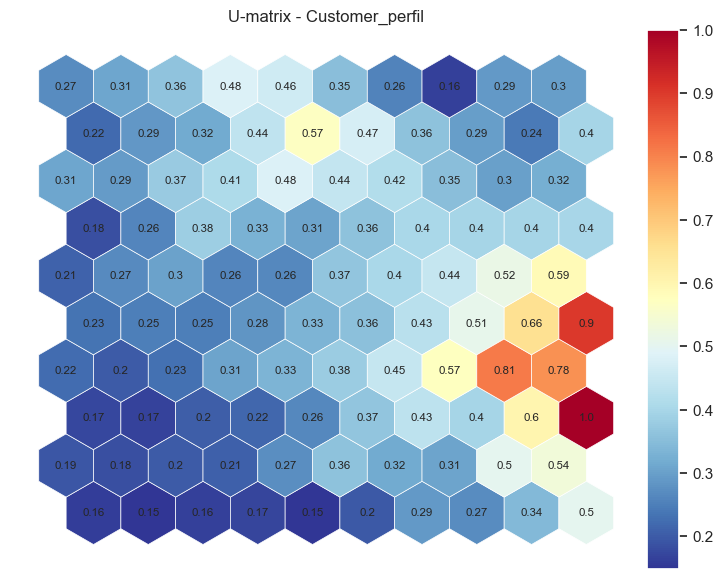


Generating U-matrix for category: Purchasing_patterns


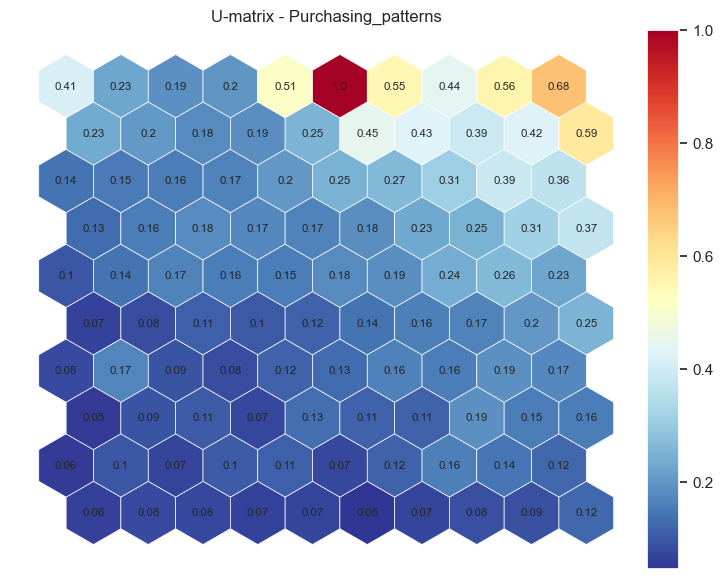


Generating U-matrix for category: Customer_behavior


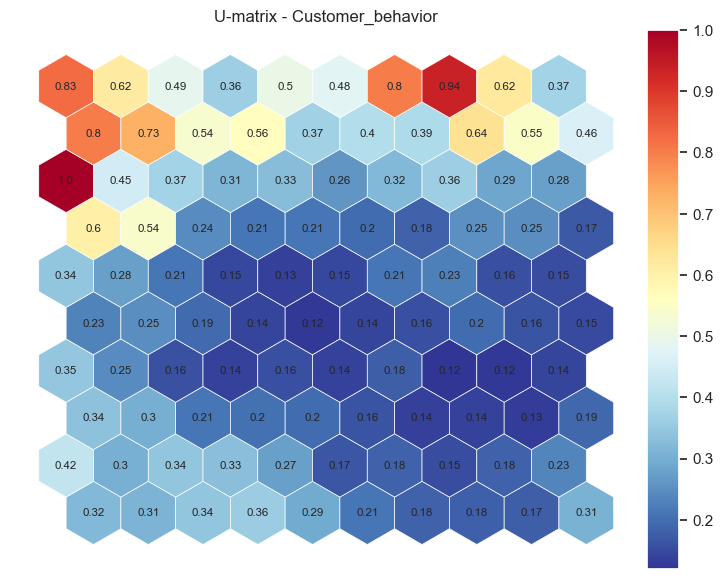


Generating U-matrix for category: Culinary_preferences


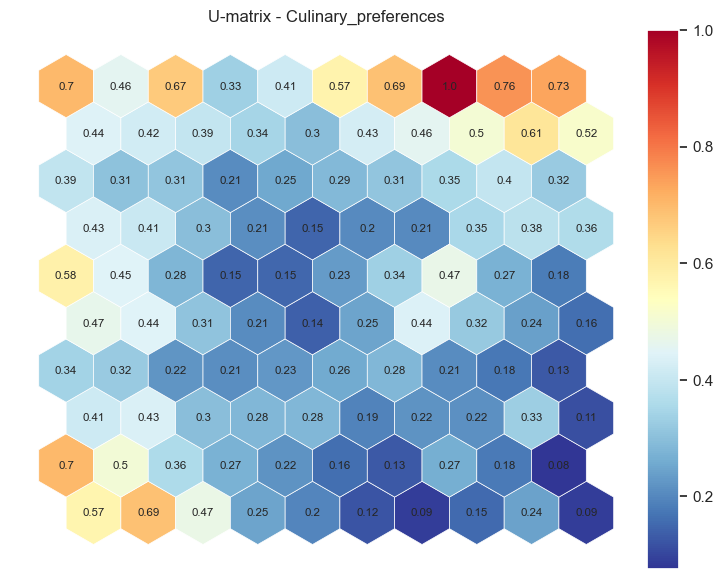

In [ ]:
figsize = (10, 7)

# Iterate over categories
for category, features in categories.items():
    print(f"\nGenerating U-matrix for category: {category}")
    
    
    valid_features = [col for col in features if col in df.columns]
    if not valid_features:
        print(f"Attention: No valid resources found for {category}")
        continue

    # Prepare data and train SOM
    som_data = df[valid_features].values
    n_feats = len(valid_features)

    # Configure and train SOM
    sm = MiniSom(10, 10, n_feats, 
                 learning_rate=0.7, 
                 topology='hexagonal', 
                 neighborhood_function='gaussian', 
                 random_seed=42)
    sm.random_weights_init(som_data)
    sm.train_batch(som_data, 20000)

    # Calculate the U-matrix
    umatrix = sm.distance_map(scaling='mean')
    colornorm = mpl_colors.Normalize(vmin=np.min(umatrix), vmax=np.max(umatrix))
    

    fig = plt.figure(figsize=figsize)
    
    # Plot the U-matrix
    plot_hexagons(som=sm, 
                  sf=fig, 
                  colornorm=colornorm, 
                  matrix_vals=umatrix, 
                  label=f"U-matrix - {category}", 
                  cmap=cm.RdYlBu_r, 
                  annot=True)

    plt.show()


In [ ]:
## Flip and rotate to match plot
print(np.flip(np.round(umatrix,2), axis=1).T)

[[0.11 0.09 0.11 0.17 0.13 0.19 0.24 0.3  0.61 0.7 ]
 [0.16 0.17 0.1  0.12 0.12 0.16 0.21 0.26 0.5  1.  ]
 [0.13 0.13 0.13 0.12 0.12 0.15 0.18 0.29 0.47 0.57]
 [0.08 0.1  0.13 0.09 0.09 0.13 0.2  0.21 0.28 0.46]
 [0.12 0.14 0.11 0.09 0.11 0.18 0.2  0.18 0.25 0.28]
 [0.14 0.16 0.13 0.14 0.13 0.14 0.17 0.15 0.22 0.27]
 [0.2  0.19 0.18 0.16 0.18 0.18 0.21 0.23 0.22 0.22]
 [0.26 0.26 0.24 0.22 0.18 0.22 0.27 0.27 0.26 0.31]
 [0.42 0.36 0.35 0.26 0.22 0.25 0.37 0.4  0.47 0.49]
 [0.56 0.44 0.53 0.44 0.23 0.24 0.39 0.75 0.5  0.64]]



Generating SOM Hits Map for category: Customer_perfil


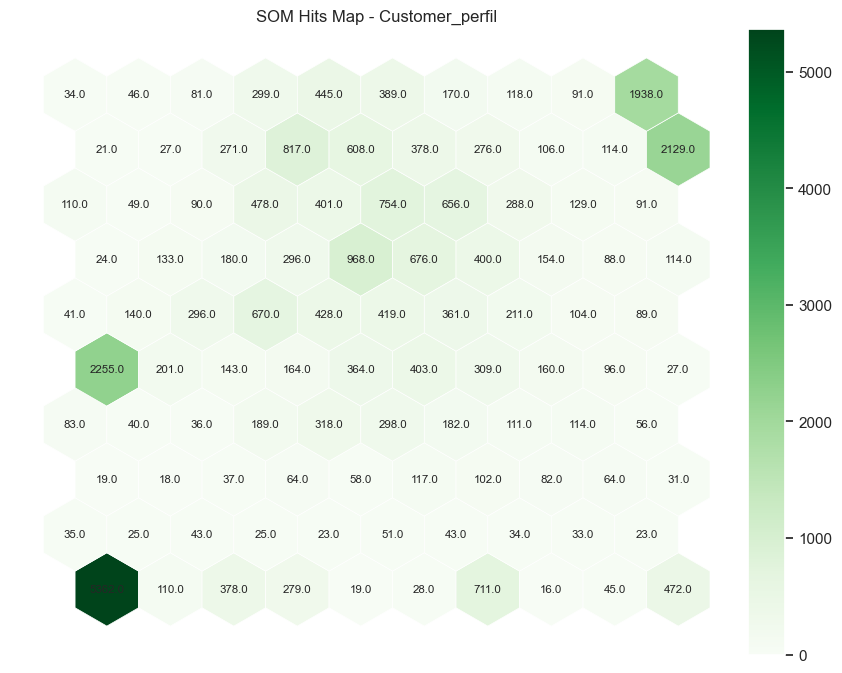


Generating SOM Hits Map for category: Purchasing_patterns


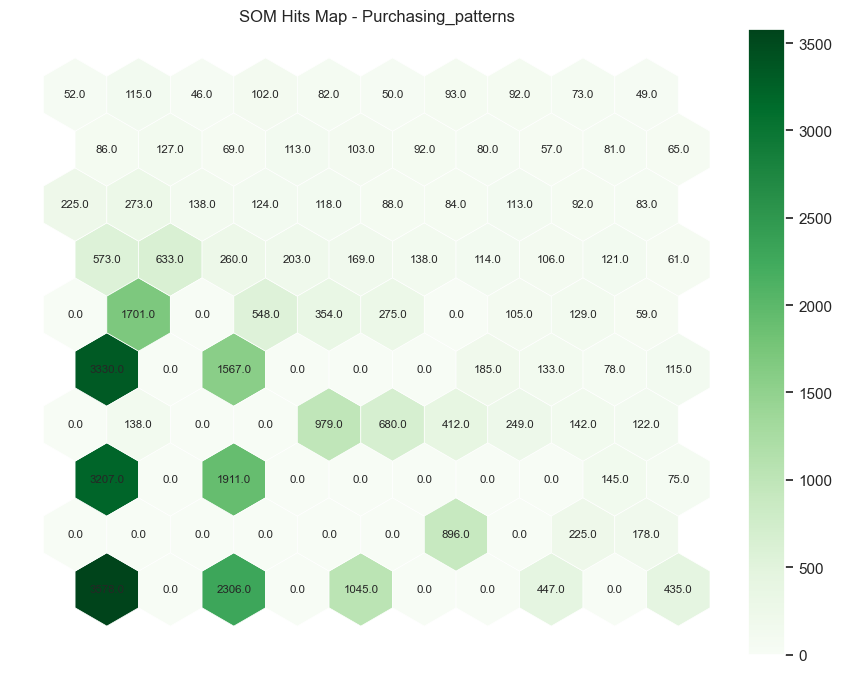


Generating SOM Hits Map for category: Customer_behavior


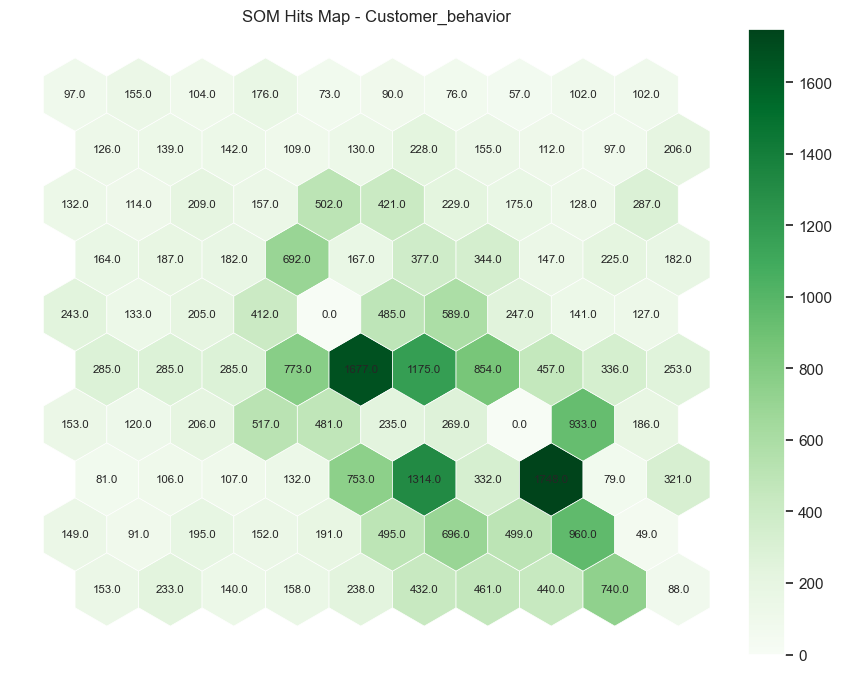


Generating SOM Hits Map for category: Culinary_preferences


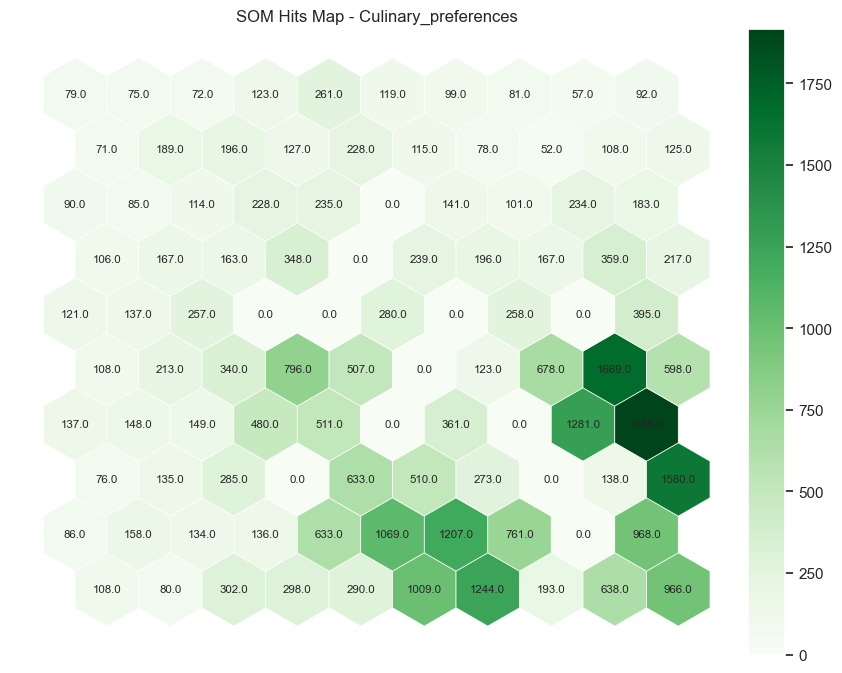

In [ ]:
figsize = (10, 10)


for category, features in categories.items():
    print(f"\nGenerating SOM Hits Map for category: {category}")
    
    
    valid_features = [col for col in features if col in df.columns]
    if not valid_features:
        print(f"Attention: No valid resources found for {category}")
    

    # Prepare data and train SOM
    som_data = df[valid_features].values
    n_feats = len(valid_features)

    # Configure and train SOM
    sm = MiniSom(10, 10, n_feats, 
                 learning_rate=0.7, 
                 topology='hexagonal', 
                 neighborhood_function='gaussian', 
                 random_seed=42)
    sm.random_weights_init(som_data)
    sm.train_batch(som_data, 20000)

    # Generate the hitsmatrix for the current category
    hitsmatrix = sm.activation_response(som_data)
    colornorm = mpl_colors.Normalize(vmin=0, vmax=np.max(hitsmatrix))
    fig = plt.figure(figsize=figsize)


    fig = plot_hexagons(
        som=sm,
        sf=fig,
        colornorm=colornorm,
        matrix_vals=hitsmatrix,
        label=f"SOM Hits Map - {category}",
        cmap=cm.Greens,
        annot=True
    )


    plt.show()


In [ ]:
## Values of HITS:
## Flip and rotate to match plot
np.flip(np.round(hitsmatrix,2), axis=1).T

array([[  79.,   75.,   72.,  123.,  261.,  119.,   99.,   81.,   57.,
          92.],
       [  71.,  189.,  196.,  127.,  228.,  115.,   78.,   52.,  108.,
         125.],
       [  90.,   85.,  114.,  228.,  235.,    0.,  141.,  101.,  234.,
         183.],
       [ 106.,  167.,  163.,  348.,    0.,  239.,  196.,  167.,  359.,
         217.],
       [ 121.,  137.,  257.,    0.,    0.,  280.,    0.,  258.,    0.,
         395.],
       [ 108.,  213.,  340.,  796.,  507.,    0.,  123.,  678., 1669.,
         598.],
       [ 137.,  148.,  149.,  480.,  511.,    0.,  361.,    0., 1281.,
        1915.],
       [  76.,  135.,  285.,    0.,  633.,  510.,  273.,    0.,  138.,
        1580.],
       [  86.,  158.,  134.,  136.,  633., 1069., 1207.,  761.,    0.,
         968.],
       [ 108.,   80.,  302.,  298.,  290., 1009., 1244.,  193.,  638.,
         966.]])

<div class="alert alert-block alert-success">
<a class="anchor" id="section_6">
    
# 6. DBSCAN
    
</a>
<div>

In [256]:
def neighbors_dist (df, n_neighbors):
    """
    Plots the distance to the nearest neighbors for a dataset.

    This function uses the `NearestNeighbors` algorithm from the `sklearn` library to compute the distance to the nearest neighbors of each point in the provided dataset. 
    The resulting plot helps identify the density of the data based on the distance between points, which can be useful for determining an appropriate value for the `min_pts`
    parameter (minimum number of points) in methods like DBSCAN.

    Parameters:
    -----------
    df : pandas.DataFrame or numpy.ndarray
        The dataset with points for which the distances to the nearest neighbors will be computed.
        Each row represents a point, and each column represents a feature (or dimension).
    
    n_neighbors : int
        The number of neighbors to consider for each point. It is typically a multiple of the number of features in the dataset (e.g., 2 * number of features).
    """

    # Initialize the NearestNeighbors algorithm
    neighbors = NearestNeighbors(n_neighbors=n_neighbors)
    
    # Fit the model and compute the distances and indices
    neighbors.fit(df)
    distances, _ = neighbors.kneighbors(df)
    
    # Sort the distances and exclude the last column (which is always the point itself)
    distances = np.sort(distances[:, -1])
    # Plot the sorted distances
    plt.plot(distances)
    plt.xlabel("Points")
    plt.ylabel("Distance to nearest neighbor")
    plt.title(f"Distance to {n_neighbors} Nearest Neighbors")
    plt.show()


In [257]:
def perform_dbscan_labels(df, eps, min_samples, n_jobs=4):
    """
    Performs DBSCAN clustering on the provided dataset and returns the cluster labels.

    This function applies the DBSCAN (Density-Based Spatial Clustering of Applications with Noise) 
    algorithm to a dataset, which groups points into clusters based on their density. 
    It returns the labels of the clusters, where each point is assigned a label indicating its cluster 
    (or -1 for noise points).

    Parameters:
    -----------
    df : pandas.DataFrame or numpy.ndarray
        The dataset on which DBSCAN clustering will be performed. Each row represents a data point, 
        and each column represents a feature (or dimension).
    
    eps : float
        The maximum distance between two samples for them to be considered as in the same neighborhood.
    
    min_samples : int
        The number of samples in a neighborhood for a point to be considered as a core point. 
        This is also the minimum number of points required to form a dense region (cluster).
    
    n_jobs : int
        The number of CPU cores to use during the computation. If -1, all cores are used.

    Returns:
    --------
    dbscan_labels : numpy.ndarray
        An array containing the labels for each point. Points that are part of a cluster are assigned 
        a non-negative integer label, while noise points are labeled as -1.
    
    """
    
    # Perform DBSCAN clustering
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=n_jobs)
    dbscan_labels = dbscan.fit_predict(df)
    
    # Return the cluster labels
    return dbscan_labels




In [24]:
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

<div >
<a class="anchor" id="section_6_1">
    
## 6.1 Customer Perfil Perspective
    
</a>
<div>

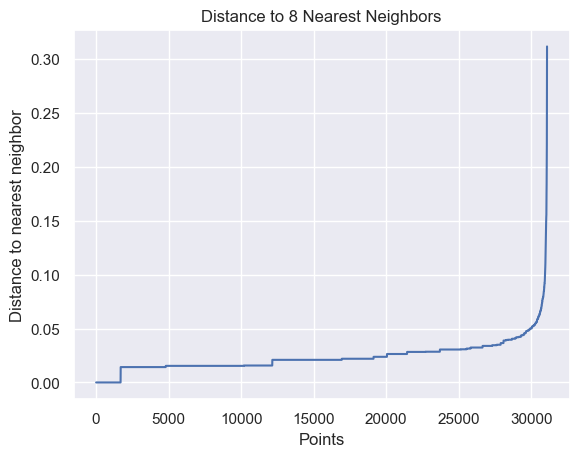

In [259]:
neighbors_dist(df_selected_1,8) # n_neighbors = 2* nº metric features (min_pts)

In [260]:
dbscan_labels= perform_dbscan_labels(df_selected_1,0.05,8,4)

# Calculate and print the number of clusters
dbscan_n_clusters = len(np.unique(dbscan_labels))
print(f"Number of estimated clusters: {dbscan_n_clusters}")

Number of estimated clusters: 7


In [261]:
# Concatenating the labels to df
df_concat = pd.concat([df_selected_1, pd.Series(dbscan_labels, index=df_clusters.index, name="dbscan_labels")], axis=1)
df_concat.head()

,customer_age,first_order,last_order,dif_order,dbscan_labels
customer_id,,,,,
1b8f824d5e,0.046154,0.0,0.011111,0.205357,0
5d272b9dcb,0.030769,0.0,0.011111,0.205357,0
f6d1b2ba63,0.353846,0.0,0.011111,0.205357,0
180c632ed8,0.169231,0.0,0.022222,0.214286,0
4eb37a6705,0.076923,0.0,0.022222,0.214286,0


In [262]:
df_concat.loc[df_concat['dbscan_labels'] == -1]

,customer_age,first_order,last_order,dif_order,dbscan_labels
customer_id,,,,,
f49ed5489a,0.553846,0.000000,0.044444,0.232143,-1
eb13ad08ad,0.492308,0.000000,0.055556,0.241071,-1
b92ab1eeec,0.492308,0.000000,0.066667,0.250000,-1
afc96f7eaa,0.415385,0.000000,0.111111,0.285714,-1
9aadcc2e76,0.353846,0.000000,0.133333,0.303571,-1
...,...,...,...,...,...
20c90aaf32,0.615385,0.244444,0.000000,0.000000,-1
4ff94a6987,0.692308,0.244444,0.000000,0.000000,-1
78c778a850,0.430769,0.244444,0.000000,0.000000,-1


In [263]:
# Computing the R^2 of the cluster solution
df_nonoise = df_concat.loc[df_concat['dbscan_labels'] != -1]
sst = get_ss(df_selected_1)  # get total sum of squares
ssw_labels = df_nonoise.groupby(by='dbscan_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.0407


C:\Users\rcouc\AppData\Local\Temp\ipykernel_6000\3396358789.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ssw_labels = df_nonoise.groupby(by='dbscan_labels').apply(get_ss)  # compute ssw for each cluster labels


In [264]:
df_concat.groupby('dbscan_labels').mean()

,customer_age,first_order,last_order,dif_order
dbscan_labels,,,,
-1,0.556903,0.346254,0.666884,0.454077
0,0.184238,0.322001,0.705065,0.504247
1,0.442308,0.011111,0.533333,0.616071
2,0.503297,0.184127,0.777778,0.673469
3,0.459615,0.348611,0.644444,0.434152
4,0.436538,0.545833,0.761111,0.369420
5,0.192154,0.244444,0.000000,0.000000


<div >
<a class="anchor" id="section_6_2">
    
## 6.2  Purchasing Patterns Perspective
    
</a>
<div>

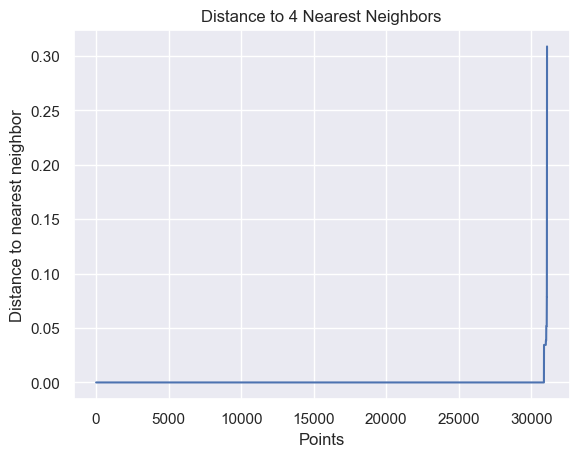

In [265]:
neighbors_dist(df_selected_2,4) # n_neighbors = 2* nº metric features (min_pts)

In [266]:
dbscan_labels= perform_dbscan_labels(df_selected_2,0.05,4,4)

# Calculate and print the number of clusters
dbscan_n_clusters = len(np.unique(dbscan_labels))
print(f"Number of estimated clusters: {dbscan_n_clusters}")

Number of estimated clusters: 7


In [267]:
# Concatenating the labels to df
df_concat = pd.concat([df_selected_2, pd.Series(dbscan_labels, index=df_clusters.index, name="dbscan_labels")], axis=1)
df_concat.head()

,tot_work_days,tot_leisure_days,dbscan_labels
customer_id,,,
1b8f824d5e,0.000000,0.068966,0
5d272b9dcb,0.000000,0.068966,0
f6d1b2ba63,0.000000,0.068966,0
180c632ed8,0.038462,0.034483,0
4eb37a6705,0.038462,0.034483,0


In [268]:
df_concat.loc[df_concat['dbscan_labels'] == -1]

,tot_work_days,tot_leisure_days,dbscan_labels
customer_id,,,
eb4664b1ac,0.307692,0.586207,-1
36269ce6f1,0.576923,0.517241,-1
be810296f1,0.307692,0.965517,-1
4a973fe7df,0.076923,0.827586,-1
bdea2df96b,0.384615,0.620690,-1
e5fb8d261a,0.769231,0.758621,-1
89ebb923a9,0.846154,0.655172,-1
9fe492b40e,0.576923,0.758621,-1
63051af585,0.923077,0.586207,-1


In [269]:
# Computing the R^2 of the cluster solution
df_nonoise = df_concat.loc[df_concat['dbscan_labels'] != -1]
sst = get_ss(df_selected_2)  # get total sum of squares
ssw_labels = df_nonoise.groupby(by='dbscan_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.0770


C:\Users\rcouc\AppData\Local\Temp\ipykernel_6000\3837483258.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ssw_labels = df_nonoise.groupby(by='dbscan_labels').apply(get_ss)  # compute ssw for each cluster labels


<div >
<a class="anchor" id="section_6_3">
    
## 6.3  Customer Behavior Perspective
    
</a>
<div>

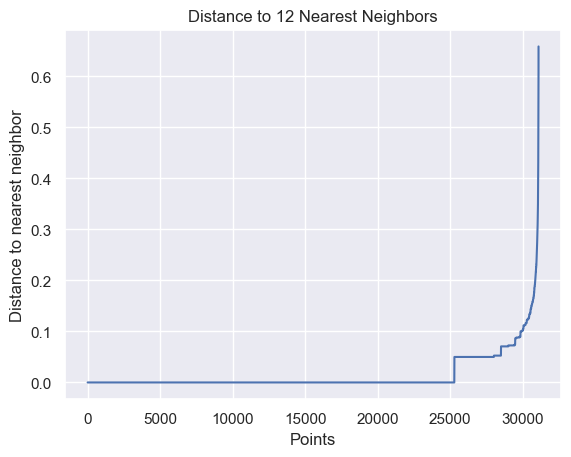

In [270]:
neighbors_dist(df_selected_3,12)

In [271]:
dbscan_labels= perform_dbscan_labels(df_selected_3,0.1,12,4)

# Calculate and print the number of clusters
dbscan_n_clusters = len(np.unique(dbscan_labels))
print(f"Number of estimated clusters: {dbscan_n_clusters}")

Number of estimated clusters: 6


In [272]:
# Concatenating the labels to df
df_concat = pd.concat([df_selected_3, pd.Series(dbscan_labels, index=df_clusters.index, name="dbscan_labels")], axis=1)
df_concat.head()

,tot_early_morning,tot_breakfast,tot_lunch,tot_afternoon,tot_dinner,tot_late_night,dbscan_labels
customer_id,,,,,,,
1b8f824d5e,0.0,0.00,0.000000,0.0,0.1,0.0,0
5d272b9dcb,0.0,0.05,0.052632,0.0,0.0,0.0,0
f6d1b2ba63,0.0,0.05,0.052632,0.0,0.0,0.0,0
180c632ed8,0.0,0.00,0.105263,0.0,0.0,0.0,0
4eb37a6705,0.0,0.10,0.000000,0.0,0.0,0.0,0


In [273]:
df_concat.loc[df_concat['dbscan_labels'] == -1]

,tot_early_morning,tot_breakfast,tot_lunch,tot_afternoon,tot_dinner,tot_late_night,dbscan_labels
customer_id,,,,,,,
9c5d8d6747,0.000000,0.00,0.315789,0.10,0.75,0.000,-1
a5347d72ea,0.105263,0.00,0.052632,0.05,0.00,0.500,-1
4d43db4f0a,0.000000,0.05,0.789474,0.15,0.10,0.000,-1
4a23e440a8,0.000000,0.00,0.000000,0.00,0.25,0.375,-1
d6e5be6382,0.000000,0.00,0.210526,0.30,0.45,0.250,-1
...,...,...,...,...,...,...,...
fbf93610a0,0.000000,0.05,0.000000,0.05,0.40,0.500,-1
fc2816f615,0.000000,0.25,0.526316,0.15,0.05,0.000,-1
77f20ddff6,0.368421,0.00,0.000000,0.00,0.05,0.125,-1


In [274]:
# Computing the R^2 of the cluster solution
df_nonoise = df_concat.loc[df_concat['dbscan_labels'] != -1]
sst = get_ss(df_selected_3)  # get total sum of squares
ssw_labels = df_nonoise.groupby(by='dbscan_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.3363


C:\Users\rcouc\AppData\Local\Temp\ipykernel_6000\1130391443.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ssw_labels = df_nonoise.groupby(by='dbscan_labels').apply(get_ss)  # compute ssw for each cluster labels


In [275]:
df_concat.groupby('dbscan_labels').mean()

,tot_early_morning,tot_breakfast,tot_lunch,tot_afternoon,tot_dinner,tot_late_night
dbscan_labels,,,,,,
-1,0.081294,0.188615,0.266551,0.193278,0.173320,0.098765
0,0.019918,0.034680,0.048322,0.043959,0.030247,0.000000
1,0.022639,0.026190,0.045195,0.027322,0.048283,0.125000
2,0.022556,0.008163,0.032223,0.015306,0.059184,0.375000
3,0.019825,0.024215,0.035166,0.026457,0.051121,0.250000
4,0.024561,0.020000,0.021053,0.013333,0.040000,0.500000


<div >
<a class="anchor" id="section_6_4">
    
## 6.4  Culinary Preferences Perspective
    
</a>
<div>

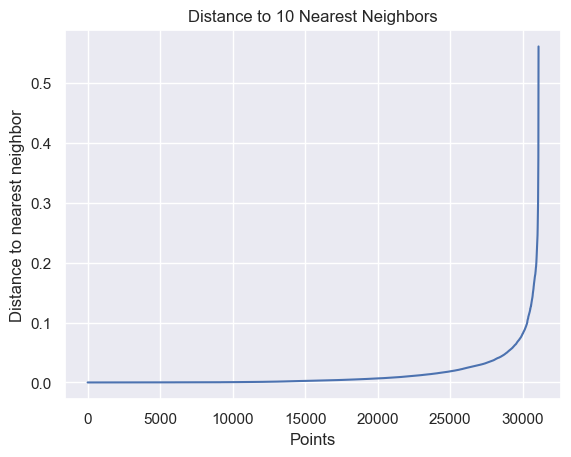

In [276]:
neighbors_dist(df_selected_4,10)

In [277]:
dbscan_labels= perform_dbscan_labels(df_selected_4,0.5,10,4)

# Calculate and print the number of clusters
dbscan_n_clusters = len(np.unique(dbscan_labels))
print(f"Number of estimated clusters: {dbscan_n_clusters}")

KeyboardInterrupt: 

In [ ]:
# Concatenating the labels to df
df_concat = pd.concat([df_selected_4, pd.Series(dbscan_labels, index=df_clusters.index, name="dbscan_labels")], axis=1)
df_concat.head()

In [ ]:
df_concat.loc[df_concat['dbscan_labels'] == -1]

In [ ]:
# Computing the R^2 of the cluster solution
df_nonoise = df_concat.loc[df_concat['dbscan_labels'] != -1]
sst = get_ss(df_selected_3)  # get total sum of squares
ssw_labels = df_nonoise.groupby(by='dbscan_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

<div class="alert alert-block alert-success">
<a class="anchor" id="section_7">
    
# 7. MeanShift Clustering
    
</a>
<div>

In [15]:
def find_best_quantile(df, quantile_range=np.arange(0.1, 0.5, 0.05), random_state=1):
    """
    Finds the best quantile for Mean Shift clustering on a DataFrame.
    
    Parameters:
        df (DataFrame): The DataFrame to analyze.
        quantile_range (array): Range of quantile values to test.
        random_state (int): Seed for reproducibility in bandwidth estimation.

    Returns:
        dict: A dictionary containing the best quantile, best score, best bandwidth, and cluster labels.
    """
    best_score = -1
    best_quantile = None
    best_bandwidth = None
    best_labels = None
    
    for quantile in quantile_range:
        # Estimate the bandwidth
        bandwidth = estimate_bandwidth(df, quantile=quantile, random_state=random_state, n_jobs=-1)
        
        # Perform Mean Shift clustering
        ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=4)
        labels = ms.fit_predict(df)
        
        # Evaluate the clustering quality
        if len(set(labels)) > 1:  # Silhouette score is only meaningful with more than 1 cluster
            score = silhouette_score(df, labels)
            if score > best_score:
                best_score = score
                best_quantile = quantile
                best_bandwidth = bandwidth
                best_labels = labels
    
    # Return the best results
    return {
        'best_quantile': best_quantile,
        'best_score': best_score,
        'best_bandwidth': best_bandwidth,
        'best_labels': best_labels
    }


<a class="anchor" id="section_7_1">
    
## 7.1  Customer Perfil Perspective
    
</a>

In [20]:
# Find the best quantile:

result = find_best_quantile(df_selected_1, quantile_range=np.arange(0.1, 0.4, 0.1), random_state=42)
print(f"Best quantile: {result['best_quantile']}")
print(f"Best score: {result['best_score']}")
print(f"Best bandwidth: {result['best_bandwidth']}")

Best quantile: 0.2
Best score: 0.477545766933908
Best bandwidth: 0.33645255614561803


In [21]:
ms = MeanShift(bandwidth=result['best_bandwidth'], bin_seeding=True, n_jobs=4) 
ms_labels = ms.fit_predict(df_selected_1)
ms_n_clusters = len(np.unique(ms_labels))
print("Number of estimated clusters : %d" % ms_n_clusters)

Number of estimated clusters : 3


In [ ]:
# Concatenating the labels to df
df_concat_perfil = pd.concat([df_selected_1, pd.Series(ms_labels, index=df_selected_1.index, name="ms_labels")], axis=1)
df_concat_perfil.groupby(by='ms_labels').mean()

,customer_age,first_order,last_order,dif_order,ms_labels
customer_id,,,,,
1b8f824d5e,0.046154,0.0,0.011111,0.205357,2
5d272b9dcb,0.030769,0.0,0.011111,0.205357,2
f6d1b2ba63,0.353846,0.0,0.011111,0.205357,2
180c632ed8,0.169231,0.0,0.022222,0.214286,2
4eb37a6705,0.076923,0.0,0.022222,0.214286,2


In [25]:
# Computing the R^2 of the cluster solution
sst = get_ss(df_selected_1)  # get total sum of squares
ssw_labels = df_concat_perfil.groupby(by='ms_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.7013


C:\Users\rcouc\AppData\Local\Temp\ipykernel_15464\3768214906.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ssw_labels = df_concat_perfil.groupby(by='ms_labels').apply(get_ss)  # compute ssw for each cluster labels


<a class="anchor" id="section_7_2">
    
## 7.2  Purchasing Patterns Perspective
    
</a>

In [31]:
result = find_best_quantile(df_selected_2, quantile_range=np.arange(0.4, 0.9, 0.2), random_state=42)

In [32]:
print(f"Best quantile: {result['best_quantile']}")
print(f"Best score: {result['best_score']}")
print(f"Best bandwidth: {result['best_bandwidth']}")

Best quantile: 0.8000000000000002
Best score: 0.7455130862253271
Best bandwidth: 0.15683605650794874


In [33]:
ms = MeanShift(bandwidth=result['best_bandwidth'], bin_seeding=True, n_jobs=4)
ms_labels = ms.fit_predict(df_selected_2)
ms_n_clusters = len(np.unique(ms_labels))
print("Number of estimated clusters : %d" % ms_n_clusters)

Number of estimated clusters : 5


In [ ]:
# Concatenating the labels to df
df_concat_purchasing = pd.concat([df_selected_2, pd.Series(ms_labels, index=df_selected_2.index, name="ms_labels")], axis=1)
df_concat_purchasing.head()
df_concat_purchasing.groupby(by='ms_labels').mean()

,tot_work_days,tot_leisure_days,ms_labels
customer_id,,,
1b8f824d5e,0.000000,0.068966,0
5d272b9dcb,0.000000,0.068966,0
f6d1b2ba63,0.000000,0.068966,0
180c632ed8,0.038462,0.034483,0
4eb37a6705,0.038462,0.034483,0


In [30]:
# Computing the R^2 of the cluster solution
sst = get_ss(df_selected_2)  # get total sum of squares
ssw_labels = df_concat_purchasing.groupby(by='ms_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.3065


C:\Users\rcouc\AppData\Local\Temp\ipykernel_15464\782448378.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ssw_labels = df_concat_purchasing.groupby(by='ms_labels').apply(get_ss)  # compute ssw for each cluster labels


<a class="anchor" id="section_7_3">
    
## 7.3   Customer Behavior Perspective
    
</a>

In [ ]:
result = find_best_quantile(df_selected_2, quantile_range=np.arange(0.6, 0.9, 0.2), random_state=42)
print(f"Best quantile: {result['best_quantile']}")
print(f"Best score: {result['best_score']}")
print(f"Best bandwidth: {result['best_bandwidth']}")

Best quantile: 0.8
Best score: 0.7455130862253271
Best bandwidth: 0.15683605650794874


In [ ]:
ms = MeanShift(bandwidth=result['best_bandwidth'], bin_seeding=True, n_jobs=4)
ms_labels = ms.fit_predict(df_selected_2)
ms_n_clusters = len(np.unique(ms_labels))
print("Number of estimated clusters : %d" % ms_n_clusters)


Number of estimated clusters : 5


In [37]:
# Concatenating the labels to df
df_concat_behavior = pd.concat([df_selected_3, pd.Series(ms_labels, index=df_selected_3.index, name="ms_labels")], axis=1)
df_concat_behavior.groupby(by='ms_labels').mean()

,tot_early_morning,tot_breakfast,tot_lunch,tot_afternoon,tot_dinner,tot_late_night,ms_labels
customer_id,,,,,,,
1b8f824d5e,0.0,0.00,0.000000,0.0,0.1,0.0,0
5d272b9dcb,0.0,0.05,0.052632,0.0,0.0,0.0,0
f6d1b2ba63,0.0,0.05,0.052632,0.0,0.0,0.0,0
180c632ed8,0.0,0.00,0.105263,0.0,0.0,0.0,0
4eb37a6705,0.0,0.10,0.000000,0.0,0.0,0.0,0


In [38]:
# Computing the R^2 of the cluster solution
sst = get_ss(df_selected_3)  # get total sum of squares
ssw_labels = df_concat_behavior.groupby(by='ms_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.0645


C:\Users\rcouc\AppData\Local\Temp\ipykernel_15464\530029619.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ssw_labels = df_concat_behavior.groupby(by='ms_labels').apply(get_ss)  # compute ssw for each cluster labels


<a class="anchor" id="section_7_4">
    
## 7.4   Culinary Preferences Perspective
    
</a>

In [ ]:
result = find_best_quantile(df_selected_2, quantile_range=np.arange(0.6, 0.9, 0.1), random_state=42)
print(f"Best quantile: {result['best_quantile']}")
print(f"Best score: {result['best_score']}")
print(f"Best bandwidth: {result['best_bandwidth']}")

Best quantile: 0.7999999999999999
Best score: 0.7455130862253271
Best bandwidth: 0.15683605650794874


In [ ]:
ms = MeanShift(bandwidth=result['best_bandwidth'], bin_seeding=True, n_jobs=4)
ms_labels = ms.fit_predict(df_selected_2)
ms_n_clusters = len(np.unique(ms_labels))
print("Number of estimated clusters : %d" % ms_n_clusters)

Number of estimated clusters : 5


In [42]:
# Concatenating the labels to df
df_concat_behavior = pd.concat([df_selected_4, pd.Series(ms_labels, index=df_selected_4.index, name="ms_labels")], axis=1)
df_concat_behavior.groupby(by='ms_labels').mean()

,tot_western_cuisines,tot_oriental_cuisines,tot_other_cuisines,purchased_cuisines,tot_CUI
ms_labels,,,,,
0,0.047866,0.064079,0.045435,0.355445,0.073279
1,0.260165,0.267166,0.257934,0.798958,0.358977
2,0.413613,0.293936,0.370015,0.888889,0.488952
3,0.414083,0.157641,0.237678,0.750000,0.375223
4,0.251389,0.260007,0.191310,0.812500,0.329440


In [43]:
# Computing the R^2 of the cluster solution
sst = get_ss(df_selected_4)  # get total sum of squares
ssw_labels = df_concat_behavior.groupby(by='ms_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.0367


C:\Users\rcouc\AppData\Local\Temp\ipykernel_15464\3307268555.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ssw_labels = df_concat_behavior.groupby(by='ms_labels').apply(get_ss)  # compute ssw for each cluster labels
